In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
print("Training set:")
train_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Train.csv")
test_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Test.csv")
sample_solution_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Sample Solution.csv")
train_df.head()

Training set:


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [63]:
print("Test set:")
test_df

Test set:


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [64]:
print("Sample solution set:")
sample_solution_df

Sample solution set:


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics
...,...,...
730,1923,sport
731,373,tech
732,1704,business
733,206,entertainment


In [65]:
print('Inspect data types and nmissing values per column:')
train_df.info()

Inspect data types and nmissing values per column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [66]:
print('Checking number of unique articles in training set:')
train_df.nunique()

Checking number of unique articles in training set:


ArticleId    1490
Text         1440
Category        5
dtype: int64

Number of articles per topic:


,Category
sport,274
business,268
politics,213
entertainment,210
tech,187


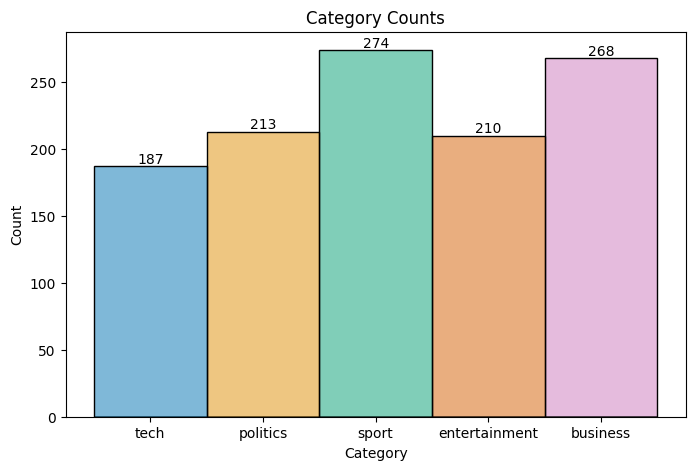

In [223]:
#-------------------- Helper functions for histogram count annotation -----------------------------
def add_histogram_values(ax): [ax.bar_label(remove_0_tags_for_histograms(b)) for b in ax.containers]
def remove_0_tags_for_histograms(ax_container):
    ind = np.where(ax_container.datavalues>0)[0]    
    ax_container.datavalues = ax_container.datavalues[ind]
    ax_container.patches = [ax_container.patches[i] for i in ind]
    return ax_container
#---------------------------------------------------------------------------------------------------
print('Number of articles per topic:')
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = sns.histplot(
    data = train_df,
    x = 'Category',
    hue = 'Category',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Category Counts');
add_histogram_values(ax)
C = pd.DataFrame(train_df['Category'].value_counts())
C

What categories contain most of the repeated Text?


/var/folders/gy/2ly271h95f334wv2rlrv6y4w0000gn/T/ipykernel_43900/857472380.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax2 = sns.histplot(


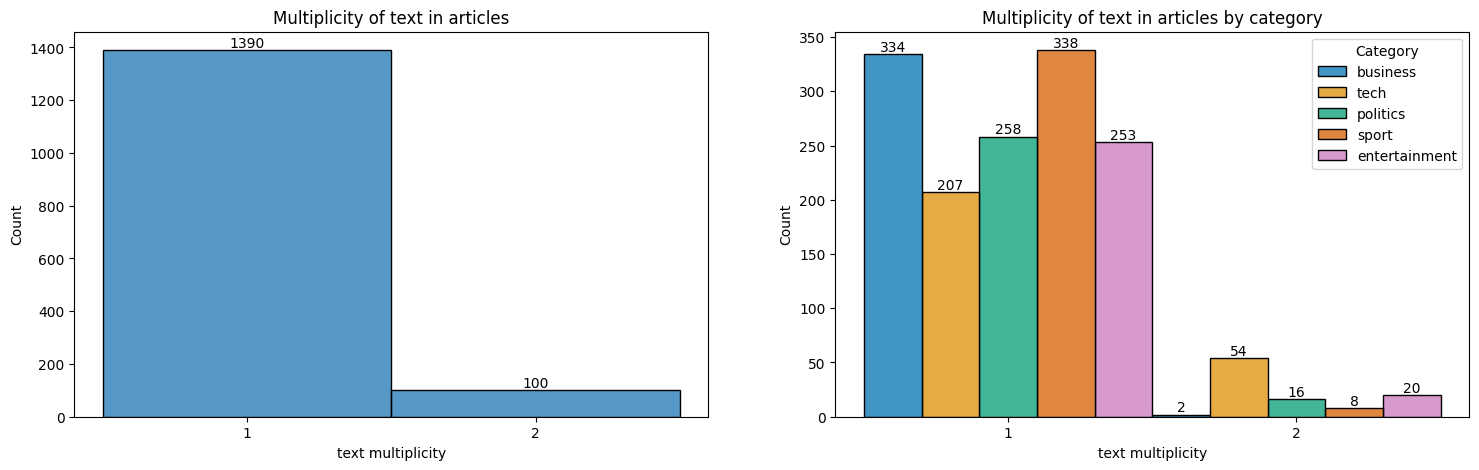

In [75]:
# Add column with multiplicity (note: leave it as a string for a prettier plot)
train_df['text multiplicity'] = train_df.groupby('Text')['Text'].transform('count').astype(str) 

print('What categories contain most of the repeated Text?')
fig, ax = plt.subplots(ncols=2,figsize=(18, 5))
# Histogram showing repeated text multiplicity in training dataframe
ax2 = sns.histplot(
    ax = ax[0],
    data = train_df,
    x='text multiplicity',
    palette = 'colorblind',
    multiple = 'dodge',
    legend = True,
    ).set(
        title = 'Multiplicity of text in articles');
add_histogram_values(ax[0])
# Same histogram, by Category
ax2 = sns.histplot(
    ax = ax[1],
    data = train_df,
    x='text multiplicity',
    hue = 'Category',
    palette = 'colorblind',
    multiple = 'dodge',
    legend = True,
    ).set(
        title = 'Multiplicity of text in articles by category');
add_histogram_values(ax[1])

In [76]:
# Check how many categories are in each repeated text group
print('The maximum number of different categories assigned to repeated texts is: {}'.format(\
train_df[train_df['text multiplicity']!='1'].groupby('Text')['Category'].nunique().max()))

The maximum number of different categories assigned to repeated texts is: 1


Number of articles per topic (without duplicates):


,Category
sport,342
business,335
politics,266
entertainment,263
tech,234


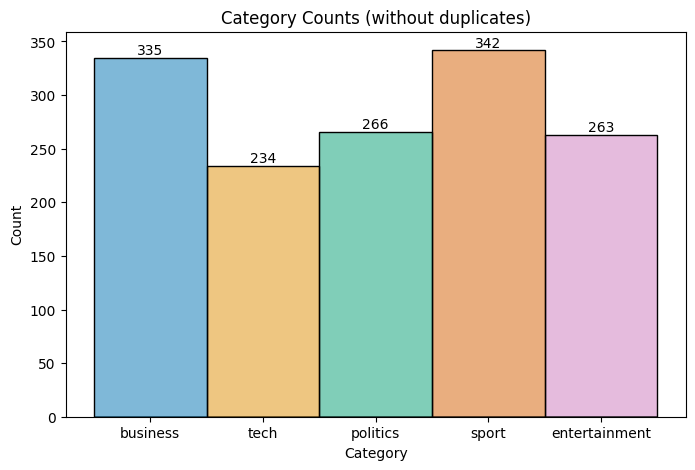

In [77]:
train_df = train_df.drop_duplicates(subset=['Text'])
print('Number of articles per topic (without duplicates):')
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = sns.histplot(
    data = train_df,
    x = 'Category',
    hue = 'Category',
    palette = 'colorblind',
    legend = False,
    ).set(
        title = 'Category Counts (without duplicates)');
add_histogram_values(ax)
pd.DataFrame(train_df['Category'].value_counts())

In [226]:
print('*'*40)
print('Sample text:')
print('*'*40)
print(train_df['Text'][0])

print('\n'+'*'*40)
print('Frequency of punctuation marks in sample text:')
print('*'*40)
[print("  {} is {} times".format(c,train_df['Text'][0].count(c))) for c in ['.',',',';','?',':','!','"',"'",")","("]];

from collections import Counter
print('\n'+'*'*40)
print('Most common words in sample text:')
print('*'*40)
for word, count in Counter(train_df['Text'][0].split()).most_common(5):
    print("  '{}' is {} times".format(word, count))

****************************************
Sample text:
****************************************
worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s exhead of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in  number   her warnings led to the collapse of the firm following the discovery of an money accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early  number  and  number   she s

In [82]:
import re
def clean_text(df,keep_dots=False):
    """ cleans the column 'Text' in a DataFrame"""
    if keep_dots:
        clean_method = lambda x: clean_string(x,True)
    else:
        clean_method = clean_string
                
    try: # DataFrame
        return df['Text'].apply(clean_method)
    except KeyError: # Series
        return df.apply(clean_method)
    
def clean_string(s,keep_dots=False):
    """Cleans a string"""
    s = re.sub("\d+", " number ", s) # change numbers to word " number "
    if keep_dots:
        s = s.translate(s.maketrans("£,;:-", "$    ","()+-*!?%")) # replace £ with $ and remove punctuation       
    else:
        s = s.translate(s.maketrans("£.,;:-", "$     ","()+-*!?%")) # replace £ with $ and remove punctuation        
    s = s.replace("$ number", "money")
    s = s.replace("number bn", "money")
    s = s.replace("money bn", "money")
    s = s.replace("money   money", "money")
    s = s.replace("money money", "money")
    s = s.replace("number   number", "number")
    s = s.replace("number number", "number")
    return s

In [83]:
# Clean training set
pd.options.mode.chained_assignment = None
train_df['Text']=clean_text(train_df)
pd.options.mode.chained_assignment = "warn"

print('*** 3 Sample texts after cleaning: ***')
[print(train_df['Text'][i]+'\n') for i in range(3)];

*** 3 Sample texts after cleaning: ***
worldcom exboss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness   cynthia cooper  worldcom s exhead of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in  number   her warnings led to the collapse of the firm following the discovery of an money accounting fraud  mr ebbers has pleaded not guilty to charges of fraud and conspiracy   prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates  but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early  number  and  number   she said andersen had given a  green light  to the procedures

In [84]:
pd.options.mode.chained_assignment = None
train_df['word count'] = train_df['Text'].apply(lambda row: len(row.split()))
train_df['char count'] = train_df['Text'].apply(lambda row: len(row))
pd.options.mode.chained_assignment = "warn"
print('Training set including number of word and number of characters per entry:')
train_df

Training set including number of word and number of characters per entry:


,ArticleId,Text,Category,text multiplicity,word count,char count
0,1833,worldcom exboss launches defence lawyers defen...,business,1,299,1879
1,154,german business confidence slides german busin...,business,1,324,2053
2,1101,bbc poll indicates economic gloom citizens in ...,business,1,511,3215
3,1976,lifestyle governs mobile choice faster bett...,tech,1,631,3648
4,917,enron bosses in money m payout eighteen former...,business,1,364,2235
...,...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1,228,1329
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,1,557,3162
1487,1590,weak dollar hits reuters revenues at media gro...,business,1,242,1429
1488,1587,apple ipod family expands market apple has exp...,tech,1,561,3318


Statistics about characters and word count in training set


/var/folders/gy/2ly271h95f334wv2rlrv6y4w0000gn/T/ipykernel_43900/3205653549.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


,ArticleId,word count,char count
count,1440.000000,1440.000000,1440.000000
mean,1118.146528,385.036806,2263.959028
std,642.822120,211.599565,1221.994692
min,2.000000,90.000000,507.000000
25%,560.750000,253.000000,1480.000000
50%,1111.000000,337.500000,1995.000000
75%,1681.250000,468.250000,2789.500000
max,2224.000000,3352.000000,18769.000000


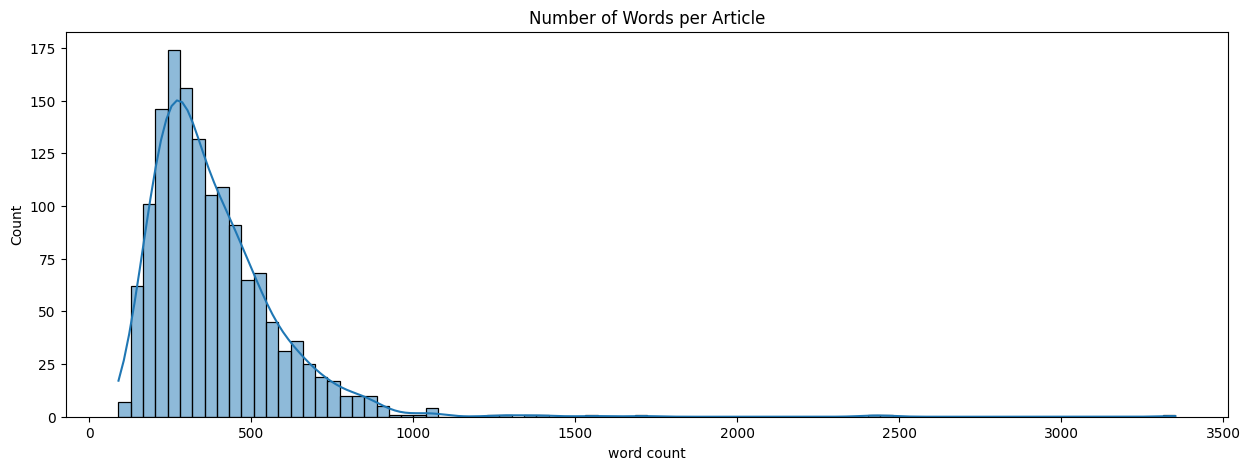

In [85]:
print('Statistics about characters and word count in training set')

fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data = train_df, 
    x = 'word count',
    palette = 'colorblind',
    kde=True,
    ).set(
        title = 'Number of Words per Article');
train_df.describe()

In [86]:
print('Word count statistics by category:')
G = train_df[['Category','word count']].groupby('Category')
G.describe()

Word count statistics by category:


word count                                                \
                   count        mean         std    min     25%    50%   
Category                                                                 
business           335.0  333.597015  132.663441  146.0  252.50  305.0   
entertainment      263.0  335.737643  204.777862  143.0  230.00  274.0   
politics           266.0  449.210526  260.855416   90.0  318.25  441.5   
sport              342.0  338.292398  187.036142  116.0  214.25  296.5   
tech               234.0  509.457265  213.427597  185.0  344.25  462.5   

                               
                  75%     max  
Category                       
business       388.50   907.0  
entertainment  380.00  2450.0  
politics       525.50  3352.0  
sport          417.75  1707.0  
tech           631.75  1557.0

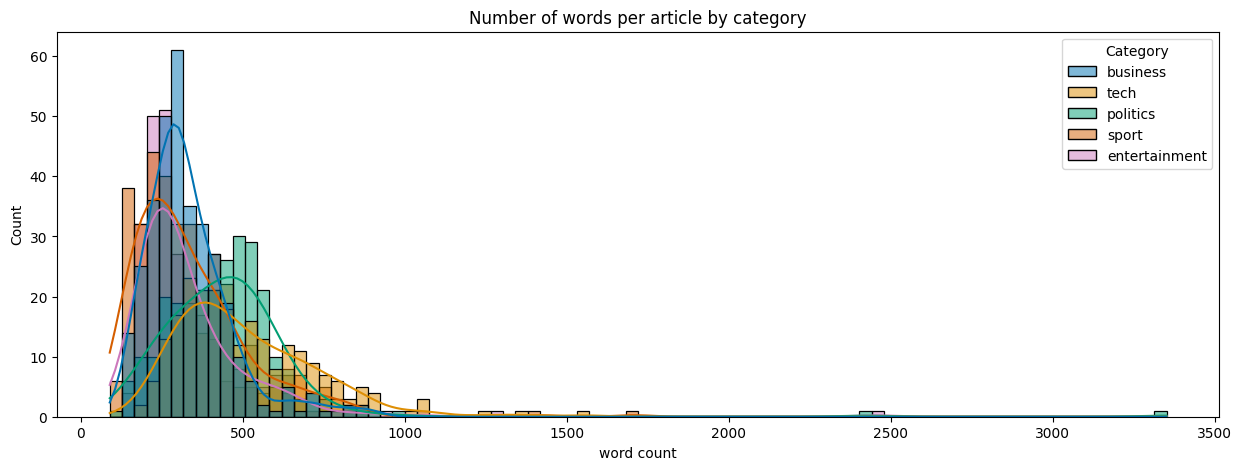

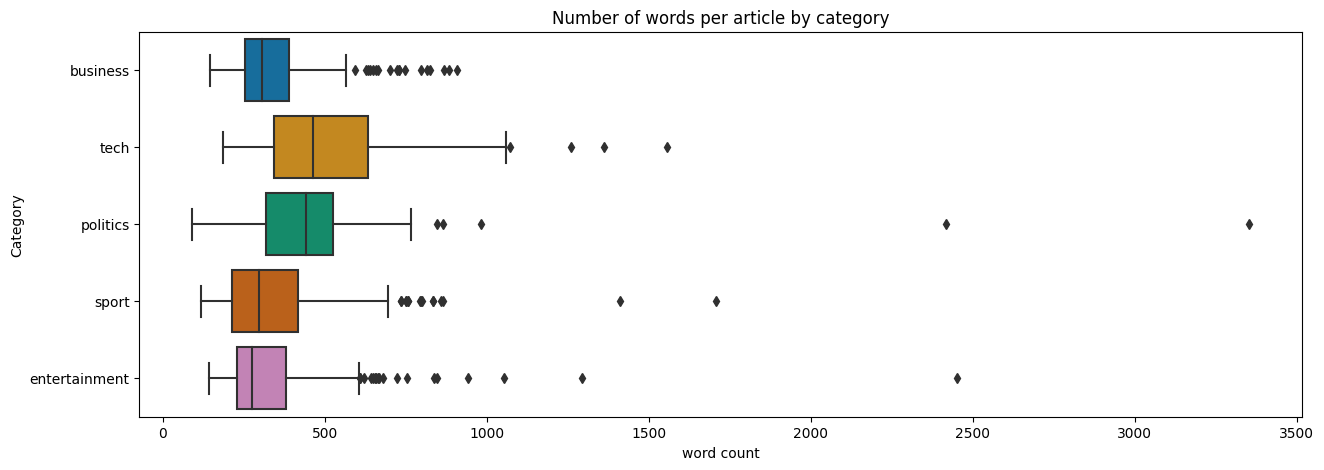

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data = train_df, 
    x = 'word count',
    palette = 'colorblind',
    kde=True,
    hue = 'Category'
    ).set(
        title = 'Number of words per article by category');

# words per category
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data = train_df, 
    x = 'word count', 
    y = 'Category',
    palette = 'colorblind'
    ).set(
        title = 'Number of words per article by category');

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
WC=cv.fit_transform(train_df['Text'])
print('There are {} documents in the training set.'.format(len(train_df)))
print('There are {} different words in the training set.'.format(WC.shape[1]))
print('The sparse Matrix WC has size {} and its sparsity is {:.2f}%. '.format(WC.shape,100*(1-WC.count_nonzero()/np.prod(WC.shape))))
print('\nCorresponding DataFrame to WC:')
counts_df = pd.DataFrame(WC.A,columns=cv.get_feature_names_out ())
counts_df

There are 1440 documents in the training set.
There are 25277 different words in the training set.
The sparse Matrix WC has size (1440, 25277) and its sparsity is 99.23%. 

Corresponding DataFrame to WC:


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
print('The most popular words amog all documents are are:')
print('\nword  count')
print(counts_df.sum().sort_values().tail())

The most popular words amog all documents are are:

word  count
in     11365
and    11931
of     12562
to     15998
the    33919
dtype: int64


In [91]:
# Include category column into word count
counts_df['_category_']=train_df['Category']

print('Word count by category:')
G = counts_df.groupby('_category_').sum()
G

Word count by category:


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
_category_,,,,,,,,,,,,,,,,,,,,,
business,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
entertainment,0,0,1,0,0,0,0,0,0,0,...,0,3,0,1,1,0,0,2,0,3
politics,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,3,0,0
sport,0,3,0,0,3,0,1,0,1,0,...,0,1,0,1,0,0,1,1,1,1
tech,0,0,0,3,0,4,0,0,1,1,...,1,0,2,0,0,2,0,1,0,0


In [92]:
is_unique = G.astype(bool).sum(axis=0)==1

total_word_count = G.sum(axis=0)

a = total_word_count[is_unique]
b = G.idxmax(axis=0)[is_unique]
c = cv.get_feature_names_out ()[is_unique]

unique_words =  pd.DataFrame(data=zip(a,b),index=c,columns=['unique word count','Category'])
print('Unique words per category:')
unique_words.groupby('Category').describe()

Unique words per category:


unique word count                                              
                          count      mean       std  min  25%  50%  75%   max
Category                                                                     
business                 2779.0  1.391868  1.035416  1.0  1.0  1.0  1.0  13.0
entertainment            2253.0  1.343098  1.063229  1.0  1.0  1.0  1.0  12.0
politics                 2009.0  1.428074  1.278043  1.0  1.0  1.0  1.0  28.0
sport                    2872.0  1.362813  1.093336  1.0  1.0  1.0  1.0  24.0
tech                     2149.0  1.396929  1.195589  1.0  1.0  1.0  1.0  18.0

In [96]:

print('Top 10 Unique words and their count per category:')
C = unique_words.groupby('Category')
U = C.max()
U['top unique word'] = C.idxmax().iloc[:,0]
U
for category,g, in C:
    print('\nCategory: ',category,'\n',g['unique word count'].nlargest(10).to_markdown())  

Top 10 Unique words and their count per category:

Category:  business 
 |            |   unique word count |
|:-----------|--------------------:|
| qantas     |                  13 |
| monsanto   |                  10 |
| ufj        |                  10 |
| arnesen    |                   9 |
| bofra      |                   9 |
| jol        |                   9 |
| pernod     |                   9 |
| ssl        |                   9 |
| bombardier |                   8 |
| greer      |                   8 |

Category:  entertainment 
 |            |   unique word count |
|:-----------|--------------------:|
| ahold      |                  12 |
| hailey     |                  12 |
| carnival   |                  11 |
| roundabout |                  11 |
| conti      |                  10 |
| elgindy    |                  10 |
| painkiller |                  10 |
| absa       |                   9 |
| binge      |                   9 |
| purushotma |                   9 |

Category: 

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer() 
WC2 = tfidf_transformer.fit_transform(WC)

tfidf_df = pd.DataFrame(WC2.A,columns = cv.get_feature_names_out ())
print('WC2 matrix representation:')
tfidf_df

WC2 matrix representation:


,aa,aaa,aaas,aac,aadc,aaliyah,aaltra,aamir,aaron,abacus,...,zonealarm,zones,zoom,zooms,zooropa,zorro,zuluaga,zurich,zutons,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
print('Raking of word scores in WC2:')
print('\n->column sum:')
print(tfidf_df.sum().sort_values())

Raking of word scores in WC2:

->column sum:
ni               0.012277
whining          0.012277
consciences      0.012277
uni              0.012277
unglamorous      0.012277
                  ...    
in             105.870227
and            106.016738
of             111.841852
to             142.631549
the            304.578104
Length: 25277, dtype: float64


In [101]:
print("Weights given to words by idf:")
pd.DataFrame(tfidf_transformer.idf_,
             cv.get_feature_names_out (),
             columns=["idf_weights"]).sort_values(by="idf_weights")

Weights given to words by idf:


,idf_weights
the,1.000000
to,1.004172
of,1.007663
in,1.008362
and,1.010464
...,...
fascination,7.579945
fascinating,7.579945
fascinate,7.579945
fastow,7.579945


Subset of the words that are in all categories (universal words):


,#of Articles with this word
count,3920.00000
mean,57.88801
std,125.26236
min,5.00000
25%,14.00000
50%,24.00000
75%,52.00000
max,1440.00000


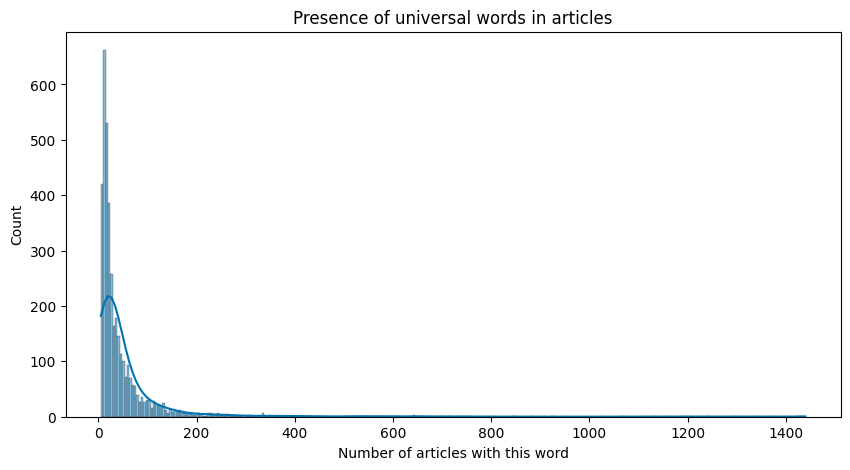

In [102]:
# Divide the words into 3 categories (unique,intermideate,universal) and merge them into a dataframe with column type:

print("Subset of the words that are in all categories (universal words):")
is_in_all_cats = G.astype(bool).sum(axis=0)==5
universal_words = pd.DataFrame(WC.getnnz(axis=0)[is_in_all_cats], # nnz = number of nonzero entries per column (count of articles with word)
                               index=G.columns[is_in_all_cats]._data,
                               columns=['#of Articles with this word'])


fig, axs = plt.subplots(ncols=1,figsize=(10, 5))
sns.histplot(
    ax=axs,
    data = universal_words, 
    legend = False,
    palette = 'colorblind',
    kde = True,
    ).set(
        title = 'Presence of universal words in articles',
        xlabel='Number of articles with this word');
universal_words.describe()

In [103]:
print('These are the 50 most common universal words:')
print(universal_words.iloc[:,0].nlargest(50))
print("\nRemark: The word money is found in {} articles".format(universal_words.loc['money'][0]))

These are the 50 most common universal words:
the       1440
to        1434
of        1429
in        1428
and       1425
number    1370
for       1335
on        1296
it        1246
is        1239
said      1226
with      1202
that      1194
has       1185
was       1157
at        1135
be        1113
by        1113
as        1074
have      1073
but       1069
from      1024
will       949
an         927
are        922
he         910
not        885
this       850
which      850
been       844
had        803
also       792
they       752
would      742
their      733
up         732
who        719
were       714
more       701
after      662
one        659
his        652
its        648
we         646
year       644
new        643
out        642
about      623
there      609
over       604
Name: #of Articles with this word, dtype: int64

Remark: The word money is found in 564 articles



Presence of words in articles by word type:



#of Articles with this word                                    \
                                   count       mean         std  min   25%   
type                                                                         
intermediate                      9295.0   4.328564    3.202857  1.0   2.0   
unique                           12062.0   1.103465    0.369969  1.0   1.0   
universal                         3920.0  57.888010  125.262360  5.0  14.0   

                                  
               50%   75%     max  
type                              
intermediate   3.0   5.0    47.0  
unique         1.0   1.0     9.0  
universal     24.0  52.0  1440.0

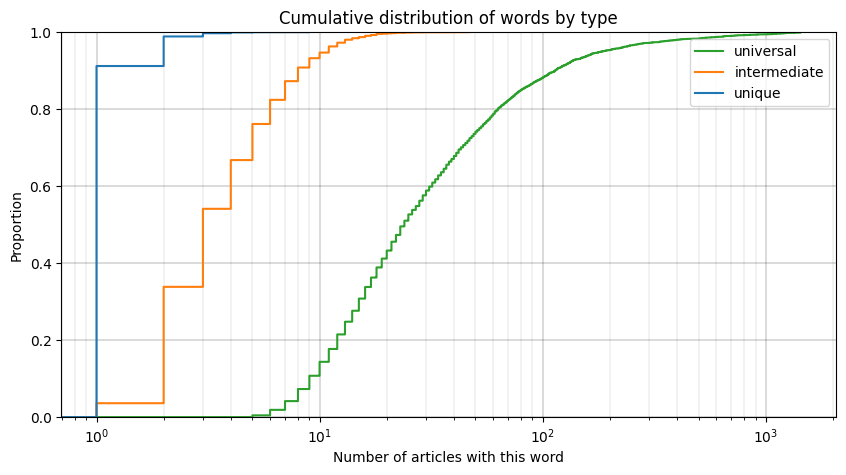

In [104]:
# Compute which words are unique, intermediate or universal

universal_words['type']='universal'
is_interm_freq_word = ~is_in_all_cats & ~is_unique
intermediate_words =  pd.DataFrame(WC.getnnz(axis=0)[is_interm_freq_word], # nnz = number of nonzero entries per column (count of articles with word)
                               index=G.columns[is_interm_freq_word]._data,
                               columns=['#of Articles with this word'])
intermediate_words['type']='intermediate'

unique_words =  pd.DataFrame(WC.getnnz(axis=0)[is_unique], # nnz = number of nonzero entries per column (count of articles with word)
                               index=G.columns[is_unique]._data,
                               columns=['#of Articles with this word'])
unique_words['type']='unique' #defined in a previous cell.

word_types = pd.concat([unique_words,intermediate_words,universal_words],axis=0)


fig, axs = plt.subplots(ncols=1,figsize=(10, 5))
k=0
hue_order=['unique','intermediate','universal']
s=sns.ecdfplot(data = word_types,
             x= '#of Articles with this word',
             hue = "type",
             hue_order=hue_order,
             legend = False,                
             log_scale=(True,False),
#              label = hue_order
            ).set(
        title = 'Cumulative distribution of words by type',
        xlabel='Number of articles with this word');

axs.grid(visible=True, which='major', color='black', linewidth=0.2)
axs.grid(visible=True, which='minor', color='black', linewidth=0.075)
axs.legend(labels=hue_order[::-1])
word_types = word_types.groupby('type')
print('\nPresence of words in articles by word type:\n')
word_types.describe()

The word 'money' is of universal type, found in 564 articles.
Boxplots of word count per category for chosen words:
The word 'number' is of universal type, found in 1370 articles.
Boxplots of word count per category for chosen words:


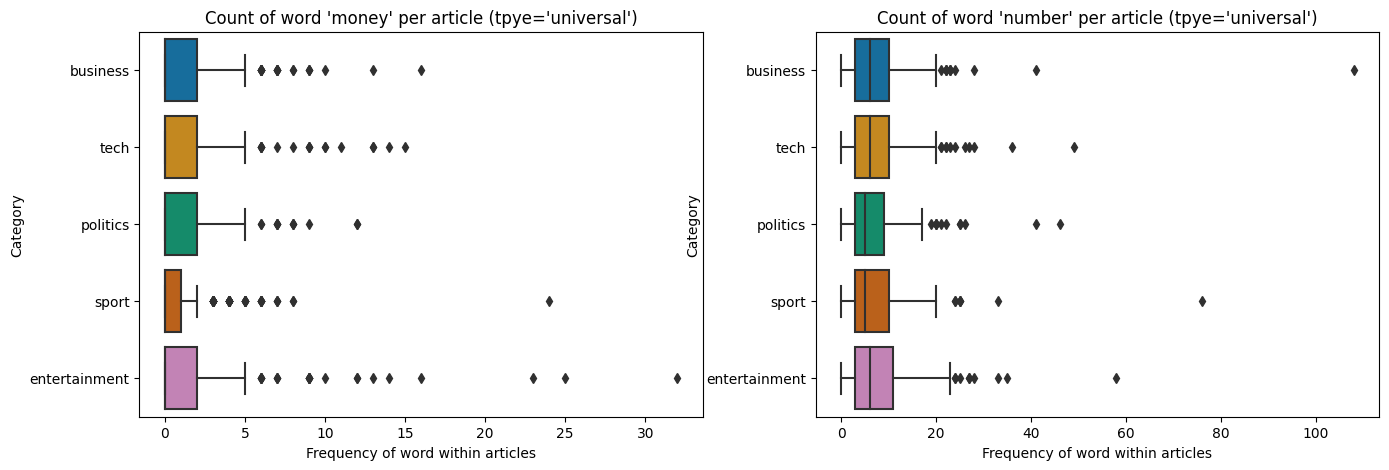

In [105]:
def get_word_type_and_count(word:str, word_types:pd.DataFrame):
    """ Returns a pandas series with word type and #of Articles with this word"""
    for word_type, group_df in word_types:
        try:
            return group_df.loc[word,:]
        except KeyError:
            pass
def print_word_type_and_count(word:str, word_types:pd.DataFrame):
    word_info = get_word_type_and_count(word, word_types)
    print("The word '{}' is of {} type, found in {} articles.".format(
        word, word_info['type'], word_info['#of Articles with this word']))     

    print('Boxplots of word count per category for chosen words:')
fig, axs = plt.subplots(ncols=2,figsize=(16, 5));
words = ('money','number')
for i,word in enumerate(words):
    word_type = get_word_type_and_count(word,word_types)['type'];
    print_word_type_and_count(word,word_types)
    
    sns.boxplot(        
        ax = axs[i],
        data = counts_df, 
        x = word, 
        y = '_category_',
        palette = 'colorblind',    
        ).set(
            title = "Count of word '{}' per article (tpye='{}')".format(word,word_type),
            xlabel = 'Frequency of word within articles',
            ylabel = 'Category');

In [108]:
from sklearn.model_selection import train_test_split
train_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Train.csv").drop_duplicates(subset=['Text'])
test_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Test.csv")
train_df, crossval_df = train_test_split(train_df,stratify=train_df[['Category']],test_size=0.2,random_state = 310)
print('Training set:')
train_df

Training set:


,ArticleId,Text,Category
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech
457,1717,regiments group in poll move a regiments cam...,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech
...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business
1093,70,indonesia declines debt freeze indonesia no ...,business
1068,825,prime minister s questions so who if anyone ...,politics
470,1686,de niro completes box office coup robert de ni...,entertainment


In [109]:
print('Cross validation set:')
crossval_df

Cross validation set:


,ArticleId,Text,Category
936,1714,bmw drives record sales in asia bmw has foreca...,business
196,1696,new yob targets to be unveiled fifty new are...,politics
793,660,beckham rules out management move real madrid ...,sport
851,2185,japanese mogul arrested for fraud one of japan...,business
668,328,nadal marches on in mexico rafael nadal contin...,sport
...,...,...,...
201,601,snow patrol feted at irish awards snow patrol ...,entertainment
1485,857,double eviction from big brother model caprice...,entertainment
1477,883,web logs aid disaster recovery some of the mos...,tech
92,212,straw attacked on china arms moves to lift the...,politics


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
class MyData(object):
    """
    Represent text data as a sparse matrix with TfidfVectorizer
    Note: This class does not follow sklearn syntax. 
    """
    def __init__(self,df,TfidfVec=None,clean_text=True,**TtdifVec_kwargs):
        """
        Inputs:
        -df: a DataFrame including column "Text"
        -TfidfVec: previously fitted TfidfVectorizer object (pass None for a new fit)        
        -clean_text: if True, 'Text' column will be cleaned.
        -TtdifVec_kwargs: parameters to pass when the TfidfVectorizer is created
        Fields:
        -MyData.words: list of words used by TfidfVec
        -MyData.tv: fitted TfidfVectorizer object
        -MyData.WC2: Sparse matrix representation of the text
        """
        self.df = df.copy()
        if clean_text:
            self.clean_text()
        self.get_WC2(TfidfVec,**TtdifVec_kwargs)
    def clean_text(self):
        self.df['Text'] = clean_text(self.df)
    def get_WC2(self,TfidfVec=None,**TtdifVec_kwargs):
        """
         Fit TfidfVectorizer to text and return a sparse matrix from tf-idf
        """
        if TfidfVec is None:
            # This is fit only done with the training data set.
            if len(TtdifVec_kwargs)==0:
                # Fit with default parameters
                self.tv = TfidfVectorizer(min_df=0.004,max_df=0.417)  
            else:
                # Fit with user defined parameters
                self.tv = TfidfVectorizer(**TtdifVec_kwargs)
                
            self.WC2 = self.tv.fit_transform(self.df['Text'])
        else:
            # The user passed the training TfidfVectorizer object
            self.tv = TfidfVec  
            self.WC2 = self.tv.transform(self.df['Text'])
        self.words = self.tv.get_feature_names_out()                   
 
    def get_WC2_as_df(self):
        """Converts the sparse matrix WC2 into a full DataFrame"""
        return pd.DataFrame(self.WC2.A,columns=self.words)
    def __repr__(self):
        return "MyData( nwords={} )".format(self.WC2.shape)
    def __str__(self):
        return  self.__repr__()
    
    
    def plot_confusion_matrix(y_true,y_pred,title='Confusion Matrix'):        
        labels = list(set(y_pred).union(set(y_true)))        
        cm = metrics.confusion_matrix(y_true,y_pred,labels=labels)
        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm, annot=True, fmt='g',ax=ax);
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title(title); 
        ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);                             
            
train_data = MyData(train_df)
crossval_data = MyData(crossval_df,train_data.tv)
test_data = MyData(test_df,train_data.tv)
print('WC2 in training data set has size:',train_data.WC2.shape)
print('WC2 in crossval_data data set has size:',crossval_data.WC2.shape)
print('WC2 in test_data data set has size:',test_data.WC2.shape)

WC2 in training data set has size: (1152, 6067)
WC2 in crossval_data data set has size: (288, 6067)
WC2 in test_data data set has size: (735, 6067)


In [ ]:
class MyNMF(object):
    """
    NMF model with helper methodsMyData obj
    Note: This class does not follow sklearn syntax. 
          I did refactor it but I was unable to make it work with categorical predictions,
          so all changes were undone.
    """
    def __init__(self, n_topics,**fit_params):
        """
        Inputs:
        -Xtrain_data: a MyData object
        -n_topics: number o topics to represent text
        -**fit_params: optional kwargs to pass when sklearn's NMF object is created
        """        
        self.n_topics = n_topics
        self.fit_params = fit_params        
        self.mapping_dict = None
    def fit(self,Xtrain_data,ytrain=None):
        
        # Default values
        self.fit_params['n_components'] = self.n_topics
        self.fit_params['beta_loss'] = self.fit_params.get('beta_loss',"frobenius")

In [133]:
from sklearn import metrics
class MyNMF(object):
    """
    NMF model with helper methodsMyData obj
    Note: This class does not follow sklearn syntax. 
          I did refactor it but I was unable to make it work with categorical predictions,
          so all changes were undone.
    """
    def __init__(self, n_topics,**fit_params):
        """
        Inputs:
        -Xtrain_data: a MyData object
        -n_topics: number o topics to represent text
        -**fit_params: optional kwargs to pass when sklearn's NMF object is created
        """        
        self.n_topics = n_topics
        self.fit_params = fit_params        
        self.mapping_dict = None
    def fit(self,Xtrain_data,ytrain=None):
        
        # Default values
        self.fit_params['n_components'] = self.n_topics
        self.fit_params['beta_loss'] = self.fit_params.get('beta_loss',"frobenius")
        self.fit_params['init'] = self.fit_params.get('init',"nndsvda")
        
        # Fit NMF model and store matrix W such that WC2 = W*H
        self.model_ = NMF(**self.fit_params).fit(Xtrain_data.WC2)
        self.words_ = Xtrain_data.words
        
        
        if ytrain is None:
            # Trivial categories
            self.mapping_dict_ = {i:i for i in range(self.n_topics)}
            return self
        
        W = self.transform(Xtrain_data)
        pred_ids = self.predict_topic_ids(W)
        self.train_score_, _, _ = self.match_topic_ids_to_categories(pred_ids,ytrain)        
        return self
    
    def predict(self,Xdata):
        W = self.transform(Xdata)
        pred_ids = self.predict_topic_ids(W)
        y_pred = self.map_topic_id_to_cats(pred_ids)
        return y_pred
    def transform(self,Xdata):
        W = self.model_.transform(Xdata.WC2)
        return W     
    def predict_topic_ids(self,W):    
        """ Returns indexes of largest rows in W for NMF model. There are the predicted topic ids per article"""
        return [np.argmax(row) for row in W]
    
    def match_topic_ids_to_categories(self,pred_ids,y_true, metric=metrics.accuracy_score):   
        """        
        Try permutations to map pred_ids with the categories in y_true by maximizing a given metric
        Inputs:
        - pred_ids: vector of predicted topic ids (from matrix W)
        - y_true: true categories. (Category column in dataframe)
        - metric: desired metric function with args metric(y_true,y_pred) to be maximized. Default: accuracy_score
        Returns:
        - best_metric: achieve score
        - y_pred_best: list of predicted categories
        - best_perm: dictionary containing the mapping of unique values in pred_ids to each category
        """           
        # It could be the case that there is a different number of unique elements in pred_ids and y_true.        
        # We force the mapping to fit into the categories in y_true        
        cats = set(y_true) 
        num_cats = len(cats)                      
         # initial guess
        id_to_cat = {i:c for i,c in enumerate(cats)} # we try all permutations of the keys of this dictionary  
        
        y_pred_best = [id_to_cat[c] for c in pred_ids]        
        best_metric = metric(y_true,y_pred_best)
        best_perm = id_to_cat
        # Find a permutation to maximize given metric
        for perm_ids in permutations(id_to_cat):
            id_to_cat = {i:c for i,c in zip(perm_ids,cats)}
            y_pred = [id_to_cat[c] for c in pred_ids] 
            curr_metric = metric(y_true,y_pred)
            if curr_metric>best_metric:
                best_metric = curr_metric
                y_pred_best = y_pred
                best_perm = id_to_cat   
        self.mapping_dict_ = best_perm
        return best_metric,y_pred_best,best_perm
    
    def map_topic_id_to_cats(self,pred_ids,mapping_dict=None):
        """
        Convert column indexes in W to categories based on a mapping dictionary
        """
        if mapping_dict is None: mapping_dict = self.mapping_dict_
        return list(map(lambda ix: mapping_dict[ix],pred_ids))
    
    def get_topic_words(self,n_words):
        """"
        Get dictionary with topic id and n words per topic from matrix H in NMF
        Inputs:
        - n_words: number of words to represent each topic
        """ 
        # Matrix H: each column is a word, each row is a topic.
        """Words with highest scores are representative of a topic"""
        H = self.model_.components_ 
        
        topic_names = [self.mapping_dict_[k] for k in range(self.n_topics)]
        
        topics_dict = {topic_names[k]: list(self.words_[MyNMF.get_ind_largest(row,n_words)]) \
                       for k,row in enumerate(H)}        
        return topics_dict
    
    def print_top_words(self,n_words:int =4):        
        """Print a list of top words and the corresponding topic"""
        print('Top {} words per topic:'.format(n_words))
        topics_dict = self.get_topic_words(n_words)
        [print('words: {} => topic: {}'.format(v,k)) for k,v in topics_dict.items()];
        def __repr__(self):
            return "NMF model  with {} words and {} topics".format(len(self.words_),self.n_topics)
    def __str__(self):
            return self.model_.__str__()         
    @staticmethod
    def get_ind_largest(x,k):
        """
        Return indexes of k largest components in a 1 D numpy array.
        (Fast method)
        """        
        ind_largest= x.argpartition(-k)[-k:] # this is O(n), but unsorted.
        return ind_largest[np.argsort(-x[ind_largest])]    
    @staticmethod
    def plot_topic_words(H, words, n_words, title,word_types=None):
        """Producs a bar plot for each predicted NMF topic showing the highest n scores and their words per topic"""
        num_topics = H.shape[0]
        ncols = 5
        nrows = int(np.ceil(num_topics/ncols))
        fig, axes = plt.subplots(nrows, ncols, figsize=(30, 8), sharex=True)
        axes = axes.flatten()
        for topic_idx, topic in enumerate(H):
            ind_largest = MyNMF.get_ind_largest(topic,n_words)
            top_words = words[ind_largest]
            weights = topic[ind_largest]
            ax = axes[topic_idx]
            ax.barh(top_words, weights, height=0.5)
            ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 25})
            ax.invert_yaxis()
            ax.tick_params(axis="both", which="major", labelsize=16)
            for i in "top right left".split():
                ax.spines[i].set_visible(False)                
            fig.suptitle(title, fontsize=30)
            
            # What is the type of the most representative word?

In [135]:
# Although these methods are implemented in the class, 
# they are done here as a script for an easier understanding of the method.
from sklearn.decomposition import NMF
n_top_words = 4
n_topics = 5
print('*'*55)
print('  Performing NMF X = W*H with {} topics on training set'.format(n_topics))
print('*'*55)
nmf_model = NMF(n_topics,
                beta_loss='frobenius',
               init='nndsvda')
W_train =nmf_model.fit_transform(train_data.WC2)

H_train = nmf_model.components_
print('The chosen latent dimension p is:',n_topics)
print('The size of W for training set is:',W_train.shape)
print('The size of H for training set is:',H_train.shape)
print('=>W train:\n',W_train)
print('=>H train:\n',H_train)

*******************************************************
  Performing NMF X = W*H with 5 topics on training set
*******************************************************
The chosen latent dimension p is: 5
The size of W for training set is: (1152, 5)
The size of H for training set is: (5, 6067)
=>W train:
 [[0.01309511 0.02420618 0.0271794  0.         0.14247045]
 [0.11134547 0.02397552 0.00379683 0.         0.        ]
 [0.03714079 0.00683743 0.         0.02078245 0.        ]
 ...
 [0.15174939 0.01400909 0.         0.         0.        ]
 [0.         0.00194063 0.05361567 0.13354037 0.        ]
 [0.00926076 0.00499902 0.         0.         0.19629216]]
=>H train:
 [[0.00916061 0.         0.00831077 ... 0.00467139 0.00075482 0.        ]
 [0.00095894 0.         0.00278391 ... 0.00969353 0.007275   0.01019718]
 [0.00274717 0.00116873 0.         ... 0.00297492 0.00785314 0.00040743]
 [0.00533277 0.02411645 0.         ... 0.         0.00150973 0.        ]
 [0.         0.00169104 0.00107651 ..

In [136]:
print("H train contains coefficients to p={} rows (topics), each defined by a combination of {} words.".format(*H_train.shape))
print("We will represent each topic (row) with the {} words that have the largest coefficient in H".format(n_top_words))

topics = {i:list(train_data.words[MyNMF.get_ind_largest(row,n_top_words)])  for i,row in enumerate(H_train)}
print(topics)

for i,row in enumerate(H_train):
    ind_largest = MyNMF.get_ind_largest(row,n_top_words)
    print('\nTopic in Row {} is represented by the words: \n{} with coefficients:\n{}'.format(
        i,train_data.words[ind_largest],np.round(row[ind_largest],2)))
print('\nCompare these words to the official categories:\n',set(train_data.df['Category']))

H train contains coefficients to p=5 rows (topics), each defined by a combination of 6067 words.
We will represent each topic (row) with the 4 words that have the largest coefficient in H
{0: ['mr', 'labour', 'blair', 'election'], 1: ['england', 'game', 'win', 'wales'], 2: ['money', 'us', 'growth', 'economy'], 3: ['film', 'best', 'her', 'awards'], 4: ['mobile', 'people', 'phone', 'technology']}

Topic in Row 0 is represented by the words: 
['mr' 'labour' 'blair' 'election'] with coefficients:
[0.93 0.74 0.67 0.6 ]

Topic in Row 1 is represented by the words: 
['england' 'game' 'win' 'wales'] with coefficients:
[0.38 0.32 0.25 0.23]

Topic in Row 2 is represented by the words: 
['money' 'us' 'growth' 'economy'] with coefficients:
[0.73 0.35 0.32 0.26]

Topic in Row 3 is represented by the words: 
['film' 'best' 'her' 'awards'] with coefficients:
[0.89 0.48 0.39 0.35]

Topic in Row 4 is represented by the words: 
['mobile' 'people' 'phone' 'technology'] with coefficients:
[0.36 0.34 0.25

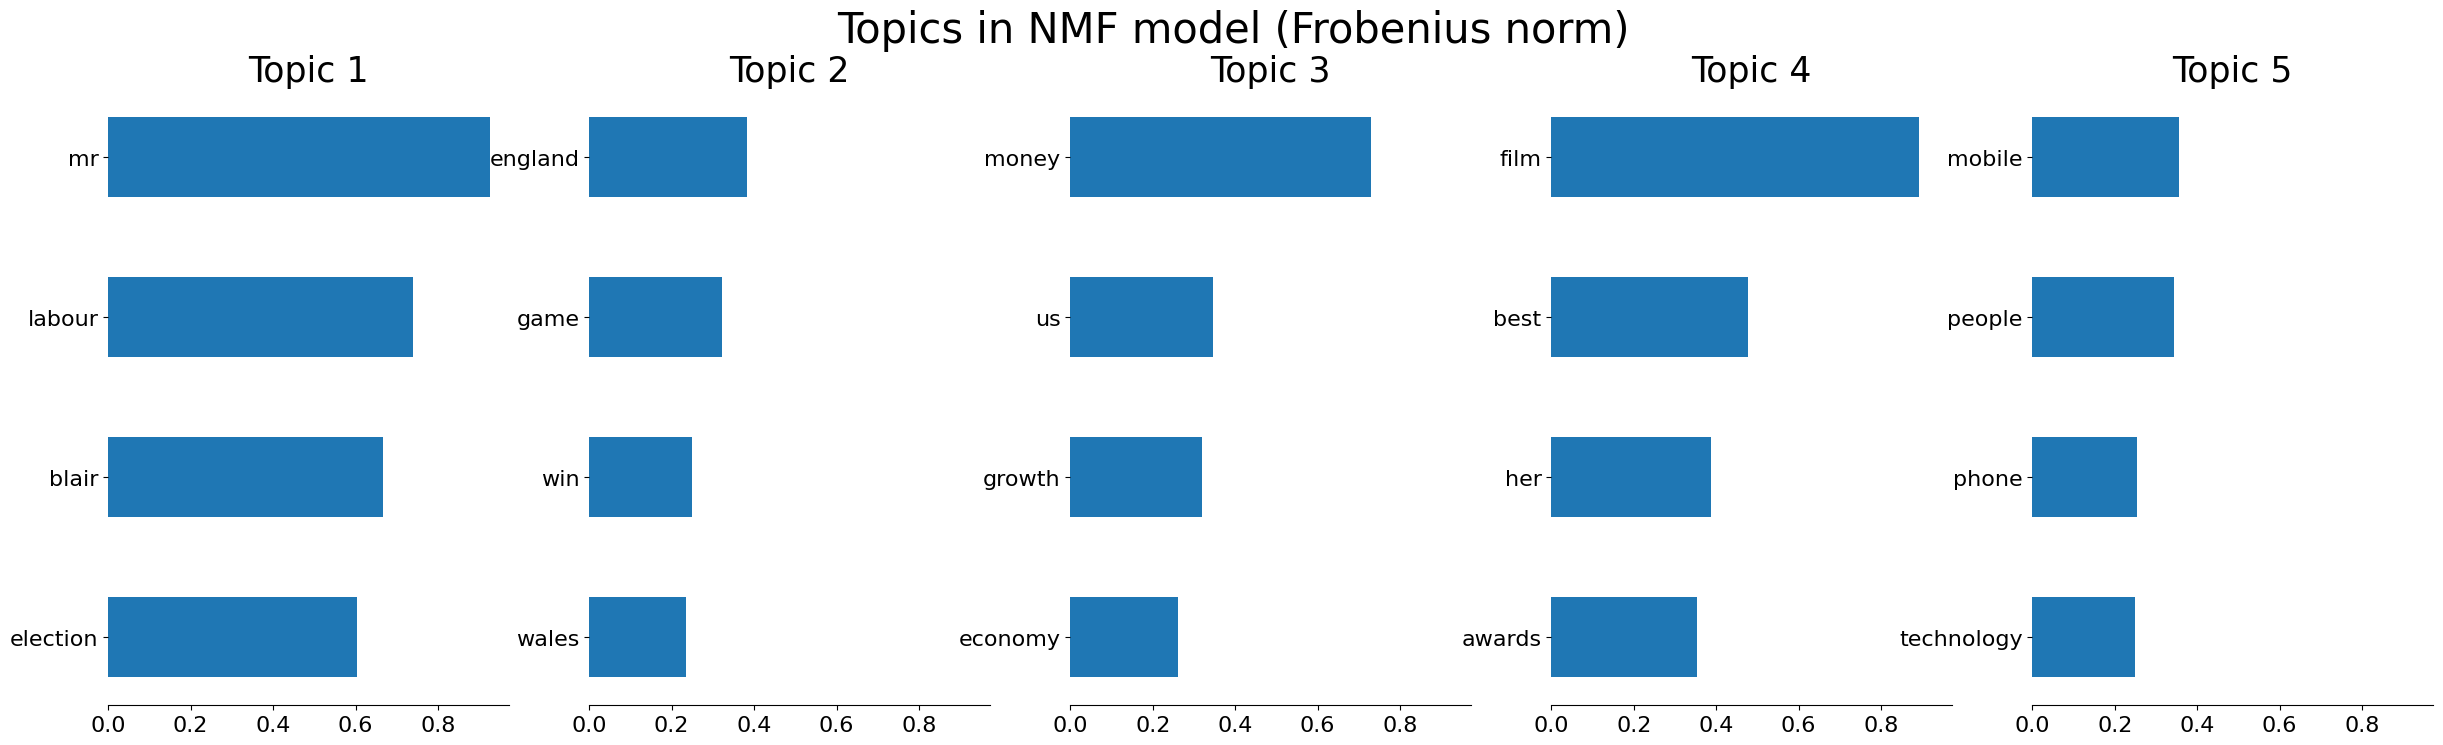

In [137]:
MyNMF.plot_topic_words(H_train,train_data.words,n_top_words,
               "Topics in NMF model (Frobenius norm)")

In [138]:
print('Training set with category and predicted topics:')
t_df= train_df.copy()
t_df['predicted_topics']=[topics[np.argmax(article)] for article in W_train]
t_df['predicted_topic_id']=[np.argmax(article) for article in W_train]
t_df['cat_id']=t_df['Category'].factorize()[0]
t_df

Training set with category and predicted topics:


,ArticleId,Text,Category,predicted_topics,predicted_topic_id,cat_id
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech,"[mobile, people, phone, technology]",4,0
457,1717,regiments group in poll move a regiments cam...,politics,"[mr, labour, blair, election]",0,1
1233,555,bnp leader nick griffin arrested the leader of...,politics,"[mr, labour, blair, election]",0,1
1372,557,barbarians 19-47 new zealand new zealand prove...,sport,"[england, game, win, wales]",1,2
489,563,cable offers video-on-demand cable firms ntl a...,tech,"[mobile, people, phone, technology]",4,0
...,...,...,...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business,"[money, us, growth, economy]",2,4
1093,70,indonesia declines debt freeze indonesia no ...,business,"[money, us, growth, economy]",2,4
1068,825,prime minister s questions so who if anyone ...,politics,"[mr, labour, blair, election]",0,1
470,1686,de niro completes box office coup robert de ni...,entertainment,"[film, best, her, awards]",3,3


In [140]:
# Repeat the above calculations using class methods from MyNMF:
from itertools import permutations 
y_true_train = train_data.df['Category']
nmf_model = MyNMF(n_topics=5).fit(train_data,y_true_train)
y_pred_train = nmf_model.predict(train_data)
acc = metrics.accuracy_score(y_true_train,y_pred_train)
nmf_model.print_top_words(10)

print('\nNMF predictions for the training set. (Accuracy = {:.3f}%)'.format(acc*100))
t_df= train_df.copy()
t_df['predicted Category (y_pred)']=y_pred_train
t_df

Top 10 words per topic:
words: ['mr', 'labour', 'blair', 'election', 'party', 'brown', 'government', 'minister', 'prime', 'howard'] => topic: politics
words: ['england', 'game', 'win', 'wales', 'ireland', 'against', 'you', 'france', 'side', 'cup'] => topic: sport
words: ['money', 'us', 'growth', 'economy', 'sales', 'market', 'oil', 'dollar', 'bank', 'economic'] => topic: business
words: ['film', 'best', 'her', 'awards', 'she', 'award', 'actor', 'actress', 'films', 'won'] => topic: entertainment
words: ['mobile', 'people', 'phone', 'technology', 'users', 'can', 'or', 'software', 'net', 'you'] => topic: tech

NMF predictions for the training set. (Accuracy = 90.365%)


,ArticleId,Text,Category,predicted Category (y_pred)
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech,tech
457,1717,regiments group in poll move a regiments cam...,politics,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech,tech
...,...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business,business
1093,70,indonesia declines debt freeze indonesia no ...,business,business
1068,825,prime minister s questions so who if anyone ...,politics,politics
470,1686,de niro completes box office coup robert de ni...,entertainment,entertainment



Accuracy for training set based on NMF: 90.365%


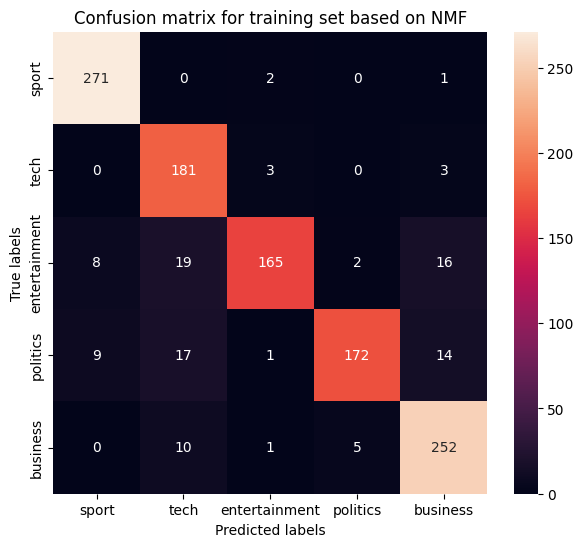

In [141]:
#Compute accuracy and confusion matrix.
print('\nAccuracy for training set based on NMF: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_train,y_pred_train,'Confusion matrix for training set based on NMF')


Accuracy for cross val set based on NMF: 86.458%


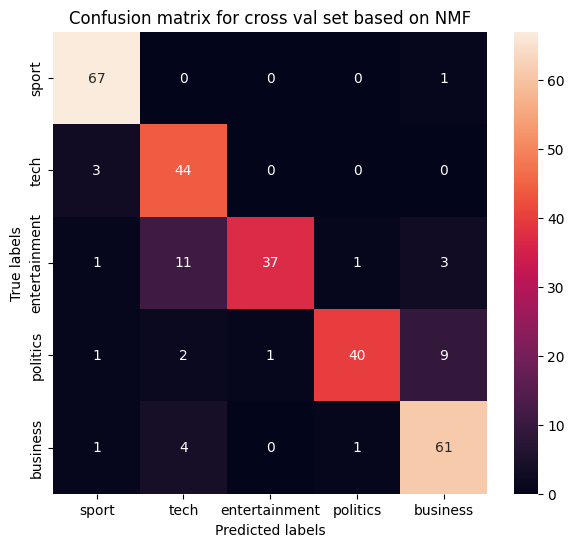

In [142]:
# Evaluate model with cross validation data
y_pred_cv = nmf_model.predict(crossval_data)
y_true_cv = crossval_data.df['Category']
acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('\nAccuracy for cross val set based on NMF: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,'Confusion matrix for cross val set based on NMF')

In [143]:
# Predict categories
y_pred_test = nmf_model.predict(test_data)
t_df = test_data.df.copy()
t_df['predicted Category']=y_pred_test
print('Predicted categories on testing set:')
t_df

Predicted categories on testing set:


,ArticleId,Text,predicted Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,business
731,373,u number to play at grammy awards show irish ...,entertainment
732,1704,sport betting rules in spotlight a group of mp...,tech
733,206,alfa romeos to get gm engines fiat is to sto...,business


In [144]:
# DataFrame for submission
nmf_predictions = test_data.df.copy()
nmf_predictions['Category']=y_pred_test
nmf_predictions.drop("Text",axis=1,inplace=True)
nmf_predictions

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,tech
733,206,business


***Model trained with full training set:***
Top 10 words per topic:
words: ['mr', 'labour', 'blair', 'election', 'brown', 'party', 'government', 'minister', 'howard', 'prime'] => topic: politics
words: ['england', 'game', 'win', 'against', 'wales', 'cup', 'you', 'ireland', 'side', 'first'] => topic: sport
words: ['money', 'us', 'growth', 'economy', 'sales', 'market', 'oil', 'bank', 'firm', 'economic'] => topic: business
words: ['film', 'best', 'awards', 'her', 'award', 'she', 'actor', 'actress', 'won', 'films'] => topic: entertainment
words: ['people', 'mobile', 'music', 'phone', 'technology', 'or', 'can', 'you', 'users', 'digital'] => topic: tech

Accuracy for full training+cross val set based on NMF trained with full data set: 88.681%


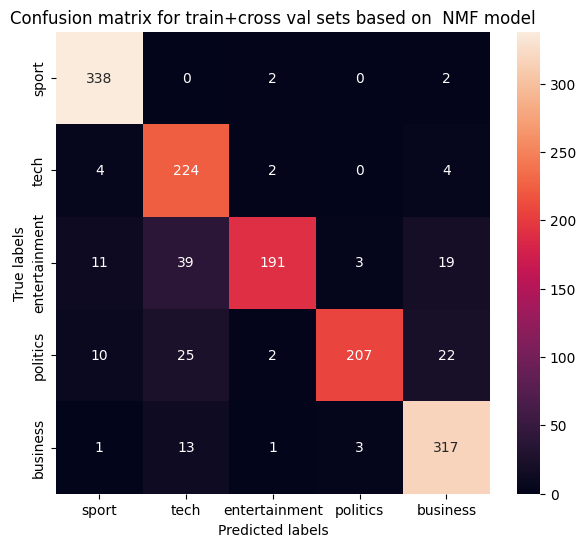

In [146]:
# Repeat model fit including the full data set
train_df_full = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Train.csv").drop_duplicates(subset=['Text'])
train_data_full = MyData(train_df_full)
y_true_train = train_data_full.df['Category']

nmf_model = MyNMF(5).fit(train_data_full,y_true_train)
y_pred_train = nmf_model.predict(train_data_full)
acc = metrics.accuracy_score(y_true_train,y_pred_train)
print('***Model trained with full training set:***')
nmf_model.print_top_words(10)
print('\nAccuracy for full training+cross val set based on NMF trained with full data set: {:.3f}%'.format(acc*100))
MyData.plot_confusion_matrix(y_true_train,y_pred_train,'Confusion matrix for train+cross val sets based on  NMF model')

In [148]:
import sys
# Delete large variables to save space
local_vars = np.array(list(locals().items()),dtype=object)
var_sizes = np.array([sys.getsizeof(obj) for var, obj in local_vars])
size_threshold = 10000 # bytes
ind = np.argsort(-var_sizes)
local_vars = local_vars[ind]
var_sizes = var_sizes[ind]
print('Large variables to be deleted:')
[print('name:',v[0],' =>size:',s,'bytes') for v,s in zip(local_vars,var_sizes) if s>10000 and v[0][0]!='_'];

Large variables to be deleted:
name: counts_df  =>size: 291282561 bytes
name: tfidf_df  =>size: 291191184 bytes
name: train_df_full  =>size: 3425530 bytes
name: train_df  =>size: 2747176 bytes
name: total_word_count  =>size: 1834259 bytes
name: t_df  =>size: 1823549 bytes
name: test_df  =>size: 1760182 bytes
name: is_unique  =>size: 1657320 bytes
name: is_interm_freq_word  =>size: 1657320 bytes
name: is_in_all_cats  =>size: 1657320 bytes
name: unique_words  =>size: 1639900 bytes
name: b  =>size: 1561581 bytes
name: intermediate_words  =>size: 1314734 bytes
name: G  =>size: 1011419 bytes
name: a  =>size: 879994 bytes
name: crossval_df  =>size: 678370 bytes
name: universal_words  =>size: 671774 bytes
name: g  =>size: 354042 bytes
name: y_true_train  =>size: 104489 bytes
name: c  =>size: 96608 bytes
name: sample_solution_df  =>size: 53505 bytes
name: nmf_predictions  =>size: 53095 bytes
name: W_train  =>size: 46208 bytes
name: y_true_cv  =>size: 20913 bytes
name: y_pred_train  =>size: 127

In [150]:
# delete
import gc
print('Deleting variables..')
for v,s in zip(local_vars,var_sizes):
    if s>size_threshold and v[0][0]!='_':
        try: 
            exec('del '+ v[0])
        except NameError:
            pass
gc.collect();
print('...Done.')

Deleting variables..
...Done.


In [165]:
from itertools import product
from time import perf_counter
from tqdm import tqdm
def product_dict(**kwargs):
    """" Build iterator for grid search with all combinations from lists in a dictionary"""
    keys = kwargs.keys()
    vals = kwargs.values()
    return [dict(zip(keys, instance)) for instance in product(*vals)]

def NMF_gridsearch(train_df,crossval_df,NMF_all_params:dict,TtdifVec_all_params:dict,verbose=1,min_acc_threshold:float=0.8):
    """
    - min_acc_threshold: float between 0.0 and 1.0. Keep only models with accuracy greater than or equal to this value.
    """
    assert 0.0<=min_acc_threshold<=1.0
      
    # Get list
    NMF_all_params=product_dict(**NMF_all_params)
    TtdifVec_all_params=product_dict(**TtdifVec_all_params)
    num_models =len(NMF_all_params)*len(TtdifVec_all_params)    
    cont = 0
    best_val_acc = 0.0    
    ALL_RESULTS = []
    if verbose in [1,2]:
        print('Grid search with {} model hyperparameter combinations'.format(num_models))
    if verbose==1:
        print('Showing only models with train and val. acc>={:.3f}%'.format(min_acc_threshold*100))
    elif verbose==2:
        print('Showing models under test. Acc=-1 meand a ValueError was raised.')        
    t0 = perf_counter()    
    for NMF_params,TtdifVec_params in tqdm(product(NMF_all_params,TtdifVec_all_params),total=num_models):
            cont+=1     
            results = test_model_params(train_df,TtdifVec_params,NMF_params,crossval_df)               
            train_acc = results['train_acc']
            val_acc = results['val_acc']
            is_high_acc_model = min_acc_threshold<val_acc and min_acc_threshold<train_acc
            
            if val_acc>best_val_acc:
                best_val_acc = val_acc
                best_results = results
            
            if is_high_acc_model:
                ALL_RESULTS.append(results)
            if verbose == 2 or (is_high_acc_model and verbose==1):
                e_time = (perf_counter() - t0)/60
                print('\nModel {} of {} (e_time={:.1f}min):'.format(cont,num_models,e_time))
                print(TtdifVec_params)
                print(NMF_params)
                print(' Train acc:{:.3f}%, Validation acc:{:.3f}%, (best val acc:{:.3f}%)'.format(
                      train_acc*100,val_acc*100,best_val_acc*100))
    if verbose==1:
        print('{} models found with val_acc>{:.3f}% '.format(len(ALL_RESULTS),100*min_acc_threshold))
    return best_results,ALL_RESULTS    
    
def test_model_params(df_train,TtdifVec_params,NMF_params,df_crossval=None):
    """ Test one set of model parameters (Allows grid search in our NMF pipeline)"""    
    # Train model
    
    train_data = MyData(df_train,TfidfVec=None,clean_text=True,**TtdifVec_params)
    y_true_train = train_data.df['Category']
    try:
        nmf_model = MyNMF(5,**NMF_params).fit(train_data,y_true_train)
    except ValueError:
        # some parameter combinations are invalid     
        model_results = {'train_acc':-1.0,
                         'val_acc':-1.0,
                         'train_data':None,
                         'nmf_model':None,
                         'TtdifVec_params':TtdifVec_params,
                         'NMF_params':NMF_params}
        return model_results
     # Evaluate model with cross validation data
    if df_crossval is None:
        val_acc = None
    else:        
        cv_data = MyData(df_crossval,TfidfVec=train_data.tv)
        y_pred_cv = nmf_model.predict(cv_data)
        y_true_cv = cv_data.df['Category']
        val_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
    
    model_results = {'train_acc': nmf_model.train_score_ ,
         'val_acc': val_acc,
         'train_data': train_data,
         'nmf_model': nmf_model,
          'TtdifVec_params': TtdifVec_params,
          'NMF_params': NMF_params
        }
    return model_results
def retrain_models(ALL_MODELS:list,df_train):
    return [retrain_model(m,df_train) for m in ALL_MODELS]

def retrain_model(nmf_model_dict,df_train):
    return test_model_params(df_train,df_crossval=None,
                      TtdifVec_params = nmf_model_dict['TtdifVec_params'],
                      NMF_params = nmf_model_dict['NMF_params'])
    
def bagging_nmf_prediction(ALL_MODELS,X_df):
    ypreds = [predict_nmf_from_result(m,X_df) for m in  ALL_MODELS]
    # Majority voting: return mode
    ypred =  pd.DataFrame(ypreds).mode().values[0].tolist()
    return ypred
def predict_nmf_from_result(nmf_model_dict,X_df):
    nmf_model = nmf_model_dict['nmf_model']
    Xdata = MyData(X_df,TfidfVec=nmf_model_dict['train_data'].tv)    
    y_pred = nmf_model.predict(Xdata)        
    return y_pred
def filter_unique_model_results(ALL_MODELS:list):
    # Models with same training and validation accuracy scores are filtered to leave only one of each.
    return pd.DataFrame(ALL_MODELS).drop_duplicates(subset=['train_acc','val_acc']).to_dict('records')

In [158]:
# Reload data
print('Reload data. \n Note: the same train/cross val split is generated to allow direct comparison of model performance.')
train_df_full = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Train.csv").drop_duplicates(subset=['Text'])
test_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Test.csv")
train_df, crossval_df = train_test_split(train_df_full,stratify=train_df_full[['Category']],test_size=0.2,random_state = 310)
print('Training set:')
train_df

Reload data. 
 Note: the same train/cross val split is generated to allow direct comparison of model performance.
Training set:


,ArticleId,Text,Category
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech
457,1717,regiments group in poll move a regiments cam...,politics
1233,555,bnp leader nick griffin arrested the leader of...,politics
1372,557,barbarians 19-47 new zealand new zealand prove...,sport
489,563,cable offers video-on-demand cable firms ntl a...,tech
...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business
1093,70,indonesia declines debt freeze indonesia no ...,business
1068,825,prime minister s questions so who if anyone ...,politics
470,1686,de niro completes box office coup robert de ni...,entertainment


In [166]:
# NMF Hyperparameter space.

# # Original search space
# NMF_all_params= {
#     'init' : ['random','random', 'nndsvda', 'nndsvdar','nndsvd'], ## nndsvd leads to low accuracy
#     'solver' : ['mu','cd'], # 'cd always leads to lower accuracy    
#     'beta_loss' : ['kullback-leibler','frobenius', 'itakura-saito'], # ['frobenius', 'itakura-saito'] both lead to low accuracy
#     'alpha_W' : [0.0,0.01,0.1]
#     }
# Reduced search space
NMF_all_params= {
    'init' : ['nndsvda','nndsvdar'], ## nndsvd leads to low accuracy
    'solver' : ['mu'], # 'cd' leads to low accuracy    
    'beta_loss' : ['kullback-leibler'], # ['frobenius', 'itakura-saito'] lead to low accuracy
    'alpha_W' : [0.0,0.01,0.05,0.1]
    }


# tf-idf Hyperparameter space.

# #Original search space
# TtdifVec_all_params = {
#     'stop_words' : ['english',None],
#     'ngram_range' : [(1,1),(1,2)],
#     'max_df' : [0.5,0.6, 0.7,0.8,0.9,0.95,0.97,0.98,0.99],
#     'min_df' : [0.001,0.002,0.005,0.02, 0.05,0.1]
#     }
# Reduced search space
TtdifVec_all_params = {
    'stop_words' : ['english'],
    'ngram_range' : [(1,2)],
    'max_df' : [0.5,0.7,0.9],
    'min_df' : [0.002]
    }

best_NMF_model,ALL_MODELS = NMF_gridsearch(train_df,crossval_df,NMF_all_params,TtdifVec_all_params,verbose=1,min_acc_threshold=0.965);
print('\nBest model is:\n',best_NMF_model)
print('\nList of models with acceptable accuracy:')
pd.DataFrame(ALL_MODELS)

Grid search with 24 model hyperparameter combinations
Showing only models with train and val. acc>=96.500%


  4%|█▊                                          | 1/24 [00:03<01:09,  3.01s/it]


Model 1 of 24 (e_time=0.1min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:97.222%, Validation acc:96.528%, (best val acc:96.528%)


  8%|███▋                                        | 2/24 [00:06<01:06,  3.02s/it]


Model 2 of 24 (e_time=0.1min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:97.222%, Validation acc:96.528%, (best val acc:96.528%)


 12%|█████▌                                      | 3/24 [00:09<01:03,  3.01s/it]


Model 3 of 24 (e_time=0.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}
 Train acc:96.875%, Validation acc:96.528%, (best val acc:96.528%)


 17%|███████▎                                    | 4/24 [00:12<01:00,  3.02s/it]


Model 4 of 24 (e_time=0.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.701%, Validation acc:96.528%, (best val acc:96.528%)


 21%|█████████▏                                  | 5/24 [00:14<00:56,  2.96s/it]


Model 5 of 24 (e_time=0.3min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.701%, Validation acc:96.528%, (best val acc:96.528%)


 25%|███████████                                 | 6/24 [00:17<00:52,  2.94s/it]


Model 6 of 24 (e_time=0.3min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.01}
 Train acc:96.788%, Validation acc:96.528%, (best val acc:96.528%)


 92%|███████████████████████████████████████▍   | 22/24 [01:09<00:06,  3.48s/it]


Model 22 of 24 (e_time=1.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.1}
 Train acc:97.049%, Validation acc:96.528%, (best val acc:96.528%)


 96%|█████████████████████████████████████████▏ | 23/24 [01:13<00:03,  3.48s/it]


Model 23 of 24 (e_time=1.2min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.7, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.1}
 Train acc:97.396%, Validation acc:96.528%, (best val acc:96.528%)


100%|███████████████████████████████████████████| 24/24 [01:16<00:00,  3.21s/it]


Model 24 of 24 (e_time=1.3min):
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.9, 'min_df': 0.002}
{'init': 'nndsvdar', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.1}
 Train acc:97.222%, Validation acc:96.528%, (best val acc:96.528%)
9 models found with val_acc>96.500% 

Best model is:
 {'train_acc': 0.9722222222222222, 'val_acc': 0.9652777777777778, 'train_data': MyData( nwords=(1152, 15338) ), 'nmf_model': <__main__.MyNMF object at 0x2b7c04d30>, 'TtdifVec_params': {'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}, 'NMF_params': {'init': 'nndsvda', 'solver': 'mu', 'beta_loss': 'kullback-leibler', 'alpha_W': 0.0}}

List of models with acceptable accuracy:


,train_acc,val_acc,train_data,nmf_model,TtdifVec_params,NMF_params
0,0.972222,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
1,0.972222,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
2,0.968750,0.965278,"MyData( nwords=(1152, 15339) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
3,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
4,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
5,0.967882,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
6,0.970486,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."
7,0.973958,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."
8,0.972222,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."


In [167]:
print('Parameters of the best individual model:')
best_NMF_model

Parameters of the best individual model:


{'train_acc': 0.9722222222222222,
 'val_acc': 0.9652777777777778,
 'train_data': MyData( nwords=(1152, 15338) ),
 'nmf_model': <__main__.MyNMF at 0x2b7c04d30>,
 'TtdifVec_params': {'stop_words': 'english',
  'ngram_range': (1, 2),
  'max_df': 0.5,
  'min_df': 0.002},
 'NMF_params': {'init': 'nndsvda',
  'solver': 'mu',
  'beta_loss': 'kullback-leibler',
  'alpha_W': 0.0}}

The accuracy of the best individual NMF model evaluated on full train + cross val set is: 97.083%


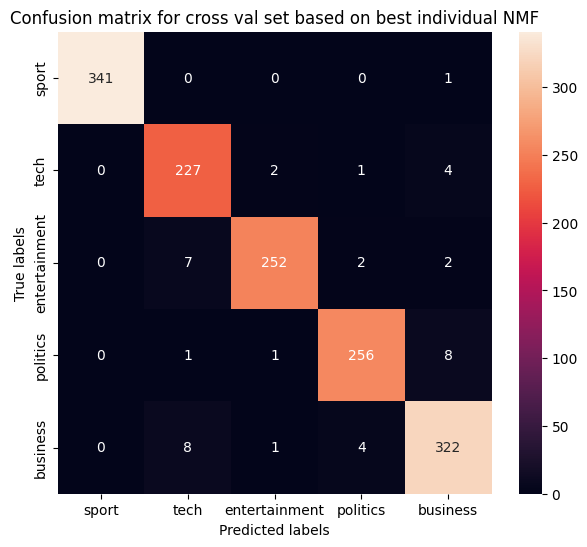

In [168]:
y_pred_best_model = predict_nmf_from_result(best_NMF_model,train_df_full)
y_true = train_df_full['Category']
acc_best_model = metrics.accuracy_score(y_true,y_pred_best_model)
print('The accuracy of the best individual NMF model evaluated on full train + cross val set is: {:.3f}%'.format(acc_best_model*100))
MyData.plot_confusion_matrix(y_true,y_pred_best_model,'Confusion matrix for cross val set based on best individual NMF')

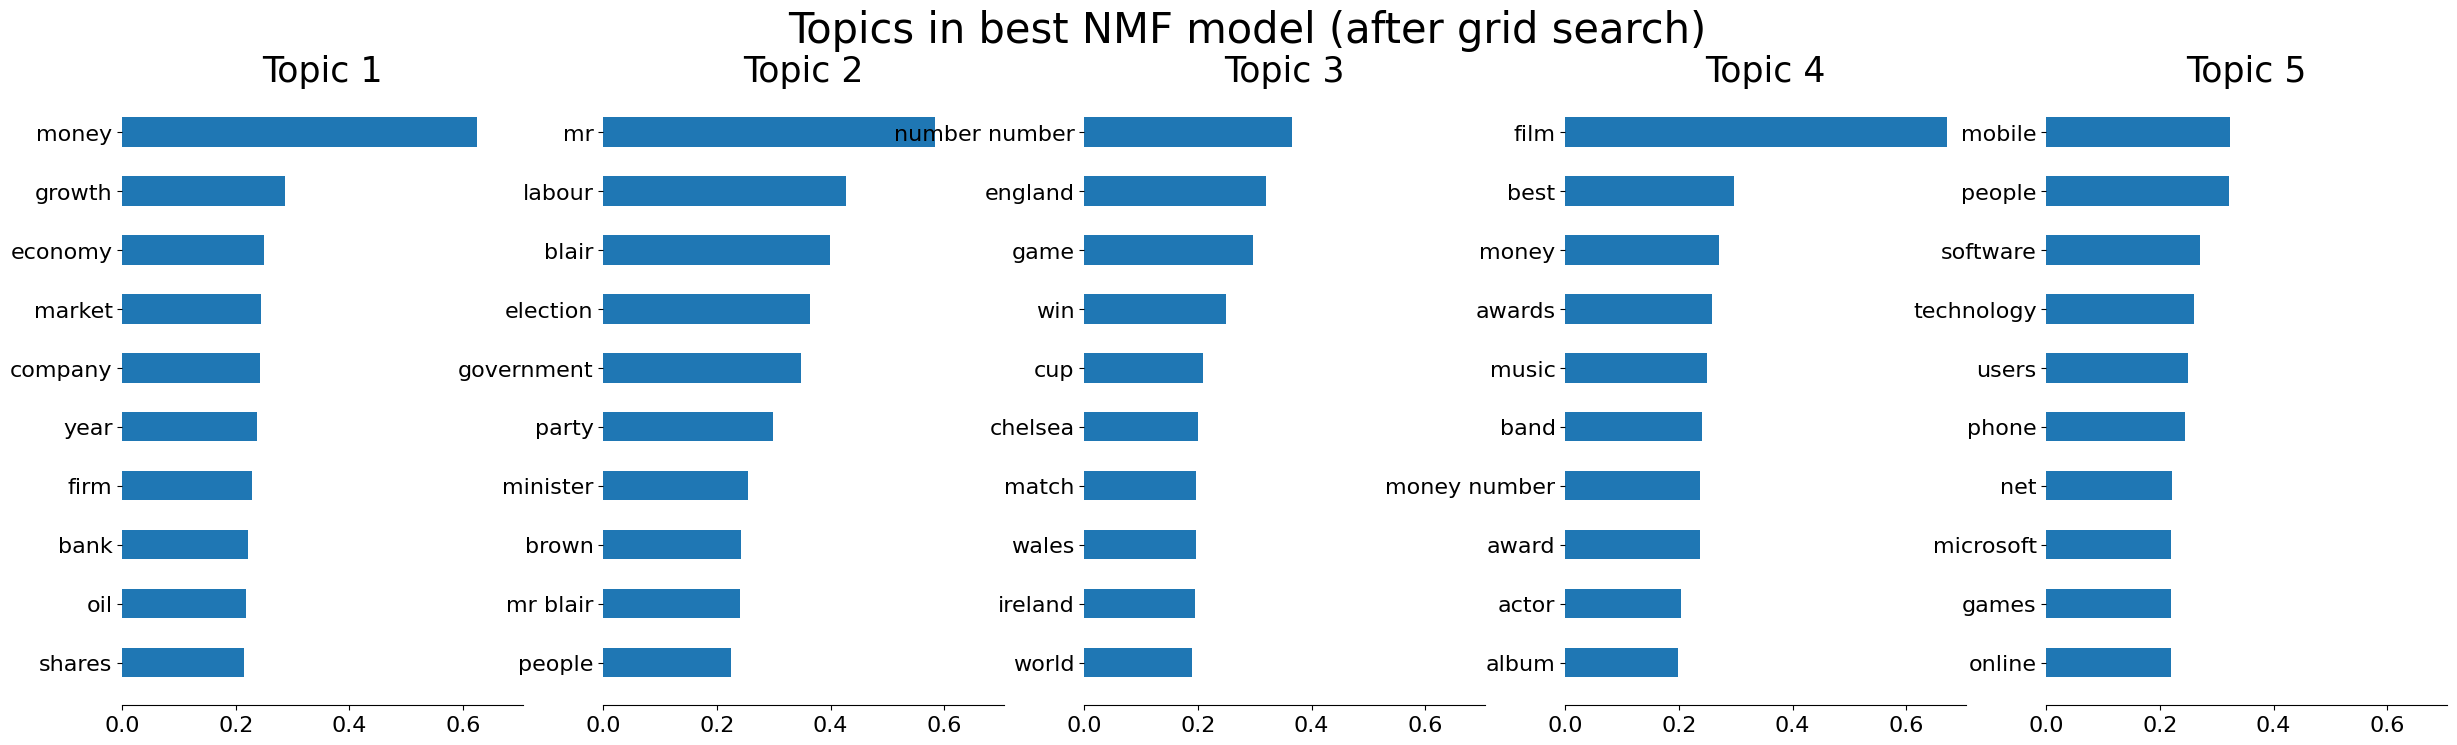

In [169]:
MyNMF.plot_topic_words(H=best_NMF_model['nmf_model'].model_.components_,
                       words = best_NMF_model['nmf_model'].words_,
                       n_words = 10,
                       title = "Topics in best NMF model (after grid search)")

The training accuracy of the NMF model with best hyperparameters retrained on full train + cross val set is: 96.736%


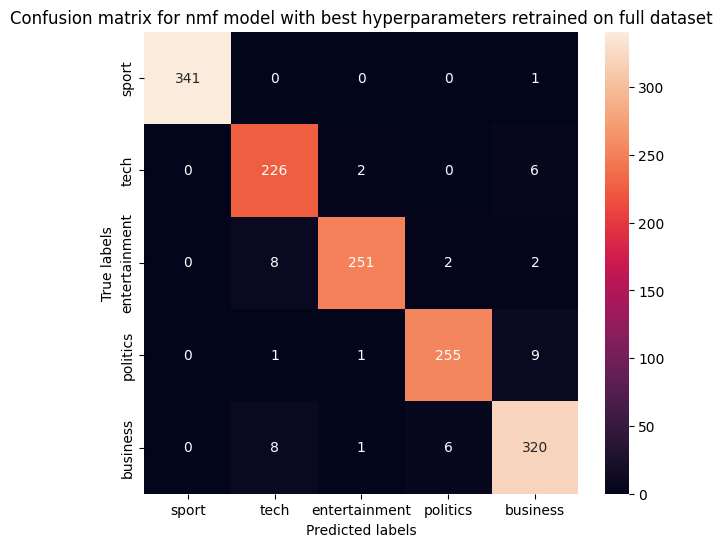

In [170]:
best_NMF_model_retrained = retrain_model(best_NMF_model,train_df_full)
y_pred_best_model = predict_nmf_from_result(best_NMF_model_retrained,train_df_full)
acc_best_model = metrics.accuracy_score(y_true,y_pred_best_model)
print('The training accuracy of the NMF model with best hyperparameters retrained on full train + cross val set is: {:.3f}%'.format(acc_best_model*100))
MyData.plot_confusion_matrix(y_true,y_pred_best_model,'Confusion matrix for nmf model with best hyperparameters retrained on full dataset')

In [171]:
print('List of different (unique) models to use as a bag of models:')
ALL_MODELS = filter_unique_model_results(ALL_MODELS)
pd.DataFrame(ALL_MODELS)

List of different (unique) models to use as a bag of models:


,train_acc,val_acc,train_data,nmf_model,TtdifVec_params,NMF_params
0,0.972222,0.965278,"MyData( nwords=(1152, 15338) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
1,0.968750,0.965278,"MyData( nwords=(1152, 15339) )","NMF(beta_loss='kullback-leibler', init='nndsvd...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
2,0.967014,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
3,0.967882,0.965278,"MyData( nwords=(1152, 15339) )","NMF(alpha_W=0.01, beta_loss='kullback-leibler'...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvda', 'solver': 'mu', 'beta_loss..."
4,0.970486,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."
5,0.973958,0.965278,"MyData( nwords=(1152, 15338) )","NMF(alpha_W=0.1, beta_loss='kullback-leibler',...","{'stop_words': 'english', 'ngram_range': (1, 2...","{'init': 'nndsvdar', 'solver': 'mu', 'beta_los..."


The accuracy of a bag with 6 models on full train+cross val set using majority voting is: 96.806%


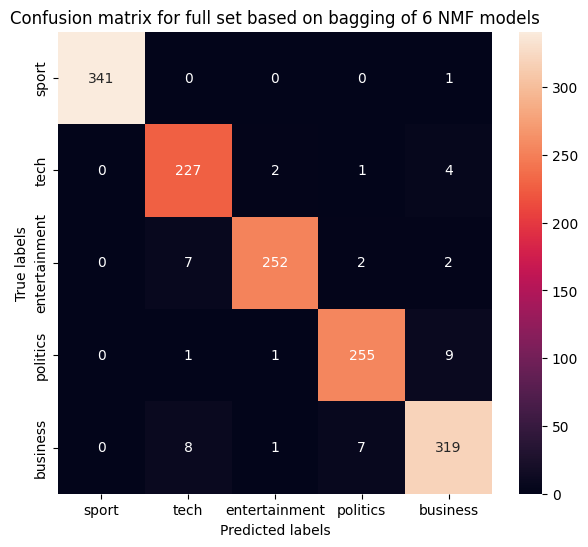

In [172]:
y_pred_bag = bagging_nmf_prediction(ALL_MODELS,train_df_full)
acc_bag = metrics.accuracy_score(y_true,y_pred_bag)
print('The accuracy of a bag with {} models on full train+cross val set using majority voting is: {:.3f}%'.format(len(ALL_MODELS),acc_bag*100))
MyData.plot_confusion_matrix(y_true,y_pred_bag,'Confusion matrix for full set based on bagging of {} NMF models'.format(len(ALL_MODELS)))

In [173]:
y_pred_test = bagging_nmf_prediction(ALL_MODELS,test_df)

print('Since bagging reduces variance, we choose bagging. Our submission is based on a bagging of  {} NMF models'.format(len(ALL_MODELS)))
    
# DataFrame for submission
filename = 'submission.csv'
try:
    os.remove("/kaggle/working/submission.csv") # remove csv file if it exists
except: 
    pass
nmd_predictions = test_data.df.copy()
nmd_predictions['Category']=y_pred_test
nmd_predictions.drop("Text",axis=1,inplace=True)
print('Submission test set predictions with NMF saved as {}'.format(filename))
nmd_predictions.to_csv('submission.csv', index=False)
nmd_predictions

Since bagging reduces variance, we choose bagging. Our submission is based on a bagging of  6 NMF models
Submission test set predictions with NMF saved as submission.csv


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,business
733,206,business


In [174]:
print('The following Hyperparameters of TfidfVectorizer were found to produce best result for NMF models, and will be used to pre-process the inputs of the supervised model:')
TtdifVec_params = best_NMF_model['TtdifVec_params']
print(TtdifVec_params)
Xdata = MyData(train_df,TfidfVec=None,clean_text=True,**TtdifVec_params)

The following Hyperparameters of TfidfVectorizer were found to produce best result for NMF models, and will be used to pre-process the inputs of the supervised model:
{'stop_words': 'english', 'ngram_range': (1, 2), 'max_df': 0.5, 'min_df': 0.002}


In [175]:
Xtrain = Xdata.WC2
ytrain = train_df['Category']
s = 1 - WC2.count_nonzero()/np.prod(WC2.shape)
print('\nWC2 will be named Xtrain. This is a sparse matrix of size {} with sparsity = {:.2f}%'.format(Xtrain.shape,100*s))
print("\nBased on WC2, we will be training a model with {} inputs and {}  samples".format(Xtrain.shape[1],Xtrain.shape[0]))


WC2 will be named Xtrain. This is a sparse matrix of size (1152, 15338) with sparsity = 99.23%

Based on WC2, we will be training a model with 15338 inputs and 1152  samples


The accuracy of our first random forest classifier on the cross validation set is 94.44%


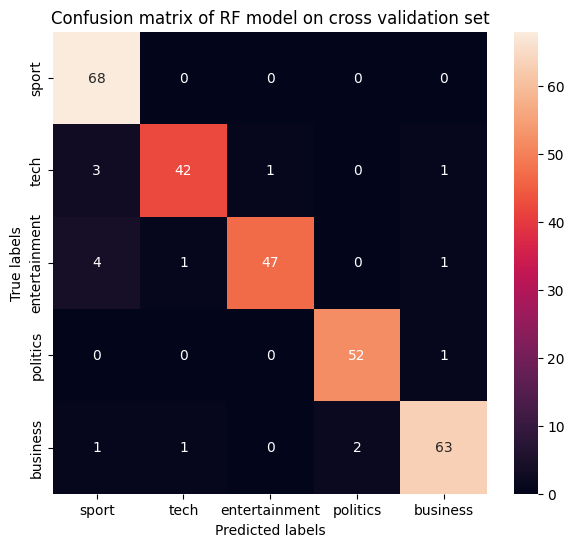

In [178]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rf_model=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model.fit(Xtrain,ytrain)
# Cross validaton set
Xcv = MyData(crossval_df,TfidfVec=Xdata.tv,clean_text=True,**TtdifVec_params).WC2
y_pred_cv=rf_model.predict(Xcv)
y_true_cv = crossval_df['Category']
rf_cv_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('The accuracy of our first random forest classifier on the cross validation set is {:.2f}%'.format(rf_cv_acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,"Confusion matrix of RF model on cross validation set")

In [179]:
print('Number of features in input data:',WC2.shape[1])
print('log2(N_features): {:.1f}'.format(np.log2(WC2.shape[1])))
print('sqrt(N_features): {:.1f}'.format(np.sqrt(WC2.shape[1])))

Number of features in input data: 25277
log2(N_features): 14.6
sqrt(N_features): 159.0


In [181]:
from sklearn.model_selection import GridSearchCV
Xtrain_full = MyData(train_df_full,TfidfVec=Xdata.tv,clean_text=True,**TtdifVec_params).WC2
ytrain_full = train_df_full['Category']

# Create a Random Forest Classifier
clf=RandomForestClassifier(n_jobs=-1)

# Hyperparameters (the original search space was larger)
parameters = {
    'n_estimators' : [100,250],
    'criterion' : ('gini','entropy'),
    'max_depth' : (None,50,100),
    'max_features' : ('sqrt','log2',50),
    }
# Grid search
print('Tuning hyperparameters')
clf2 = GridSearchCV(clf, parameters, verbose = 3)
clf2.fit(Xtrain_full,ytrain_full)

Tuning hyperparameters
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.938 total time=   2.4s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.920 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.958 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.965 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100;, score=0.962 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.948 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.931 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250;, score=0.962 total time=   0.5s
[CV

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (None, 50, 100),
                         'max_features': ('sqrt', 'log2', 50),
                         'n_estimators': [100, 250]},
             verbose=3)

In [182]:
print("Highest accuracy for RF hyperparameter tuning is: {:.3f}%".format(clf2.best_score_ ))
R = pd.DataFrame(clf2.cv_results_)
print("Showing top 10 models")
R = R.sort_values(by="rank_test_score",axis=0)
R.head(10)

Highest accuracy for RF hyperparameter tuning is: 0.956%
Showing top 10 models


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.369394,0.007829,0.058955,0.005220,gini,None,50,250,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.951389,0.927083,0.958333,0.975694,0.965278,0.955556,0.016345,1
1,0.515609,0.082117,0.059306,0.004013,gini,None,sqrt,250,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.947917,0.930556,0.961806,0.961806,0.965278,0.953472,0.012917,2
19,0.536797,0.036474,0.054596,0.005897,entropy,None,sqrt,250,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.940972,0.923611,0.972222,0.965278,0.961806,0.952778,0.017922,3
6,0.219445,0.015113,0.020905,0.000799,gini,50,sqrt,100,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.937500,0.923611,0.975694,0.968750,0.958333,0.952778,0.019469,4
13,0.487126,0.024779,0.063833,0.001478,gini,100,sqrt,250,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.944444,0.920139,0.968750,0.968750,0.961806,0.952778,0.018582,4
7,0.465999,0.026374,0.062871,0.011312,gini,50,sqrt,250,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.947917,0.920139,0.958333,0.961806,0.965278,0.950694,0.016345,6
9,0.302840,0.046584,0.050435,0.008502,gini,50,log2,250,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.944444,0.934028,0.958333,0.954861,0.961806,0.950694,0.010159,6
17,0.369144,0.016569,0.060224,0.006345,gini,100,50,250,"{'criterion': 'gini', 'max_depth': 100, 'max_f...",0.937500,0.923611,0.958333,0.968750,0.961806,0.950000,0.016811,8
3,0.318214,0.020074,0.054318,0.006056,gini,None,log2,250,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.940972,0.934028,0.951389,0.965278,0.958333,0.950000,0.011326,8
10,0.210506,0.020996,0.023915,0.005135,gini,50,50,100,"{'criterion': 'gini', 'max_depth': 50, 'max_fe...",0.944444,0.920139,0.961806,0.965278,0.958333,0.950000,0.016521,8


In [183]:
# Filter best simple model
# R =  R[(R['rank_test_score']<=10) & (R['param_max_features']=='log2')].iloc[0]
R =  R.iloc[0]
print('Parameters for the chosen model, with accuracy = {:.3f}%:'.format(R['mean_test_score']*100))
best_RF_model_params=R['params']
best_RF_model_params

Parameters for the chosen model, with accuracy = 95.556%:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': 50,
 'n_estimators': 250}

The accuracy of tuned random forest classifier on the cross validation set is 95.833%


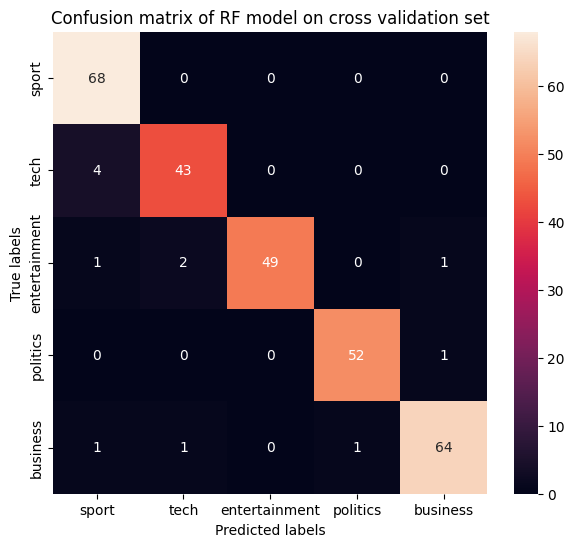

In [184]:
# Retrain model
rf_model = RandomForestClassifier(n_jobs=-1,**best_RF_model_params)
rf_model.fit(Xtrain,ytrain)
y_pred_cv=rf_model.predict(Xcv)
y_true_cv = crossval_df['Category']
rf_cv_acc = metrics.accuracy_score(y_true_cv,y_pred_cv)
print('The accuracy of tuned random forest classifier on the cross validation set is {:.3f}%'.format(rf_cv_acc*100))
MyData.plot_confusion_matrix(y_true_cv,y_pred_cv,"Confusion matrix of RF model on cross validation set")

Text(0.5, 1.0, 'Classification importance of top 10 words in random forest model')

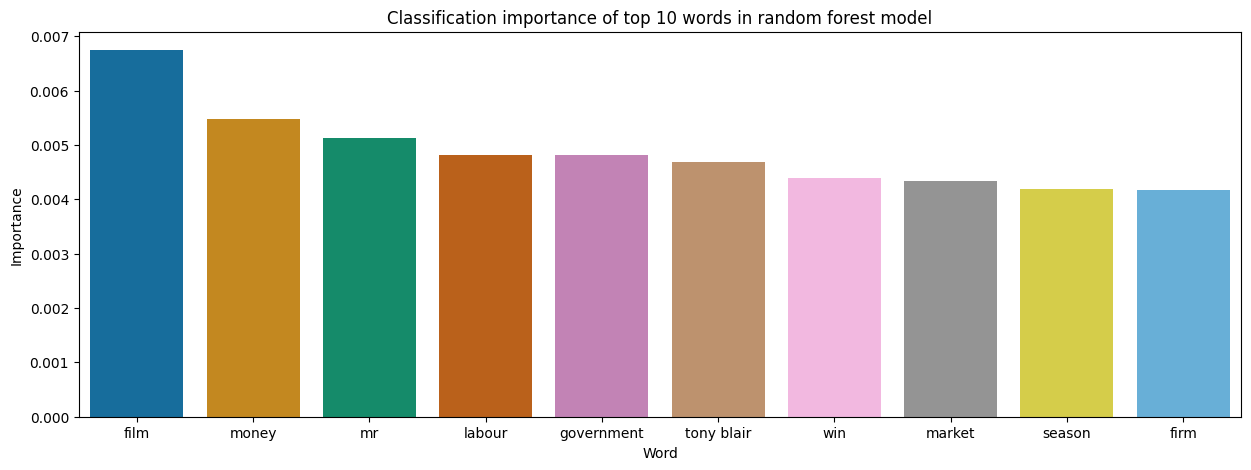

In [185]:
rf_model.feature_importances_
forest_importances = pd.Series(rf_model.feature_importances_, index=Xdata.words,name='importance')
forest_importances.sort_values(axis=0,ascending=False,inplace=True)
fig, axs = plt.subplots(figsize=(15,5))
sns.barplot(x=forest_importances.head(10).index,y=forest_importances.head(10).values,palette='colorblind',ax=axs);
axs.set_xlabel('Word')
axs.set_ylabel('Importance')
axs.set_title('Classification importance of top 10 words in random forest model')
# start_time = time.time()
# result = permutation_importance(
#     forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
# )
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# forest_importances = pd.Series(result.importances_mean, index=feature_names

In [187]:
# learning_curve
from sklearn.model_selection import learning_curve
print('Computing learning curve for Random Forest model...\n')
rf_model = RandomForestClassifier(n_jobs=-1,**best_RF_model_params)
train_sizes, train_scores, test_scores = learning_curve(
        rf_model,
        Xtrain_full,
        ytrain_full,
        verbose=3)

Computing learning curve for Random Forest model...

[learning_curve] Training set sizes: [ 115  374  633  892 1152]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.569) total time=   2.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.917) total time=   0.2s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.938) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.948) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.941) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.656) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=0.892) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.917) total time=   0.3s
[CV] END ..................., score=(train=1.000, test=0.917) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.927) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.642) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=0.917) total time=   0.2s
[CV] END ..................., score=(train=1.000, test=0.941) total time=   0.4s
[CV] END ..................., score=(train=1.000, test=0.955) total time=   0.4s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.5s finished


In [188]:
def plot_learning_curve(train_sizes,train_scores,test_scores,fig_title,axes=None):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if axes is None:fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    
    axes.errorbar(train_sizes,train_scores_mean,1.96*train_scores_std,fmt="o-",label="Training acc");
    axes.errorbar(train_sizes,test_scores_mean,1.96*test_scores_std,fmt="o-",label="Cross-validation acc");
    axes.legend(loc=4);
    axes.set_xlabel('Training size');
    axes.set_ylabel('Accuracy');
    axes.grid()
    axes.set_title(fig_title)
    

In [189]:
# Manually compute training curve for NMF model for same number of train sizes
train_scores_nmf = np.zeros((5,len(train_sizes)))
test_scores_nmf = np.zeros((5,len(train_sizes)))

train_df, crossval_df = train_test_split(train_df_full,stratify=train_df_full[['Category']],test_size=0.2,random_state = 310)

for  i,s in tqdm(enumerate(train_sizes),desc='Computing NMF model training curve with 5-fold validaton',total=len(train_sizes)): 
    for j in range(5):
        try:
            train_df_sub, _ = train_test_split(train_df,stratify=train_df[['Category']],train_size=s)        
        except ValueError:
            train_df_sub = train_df
            
        results = test_model_params(train_df_sub,
                                    best_NMF_model['TtdifVec_params'],
                                    best_NMF_model['NMF_params'],crossval_df)
        train_scores_nmf[i,j] = results['train_acc']
        test_scores_nmf[i,j] =results['val_acc']

Computing NMF model training curve with 5-fold validaton: 100%|█| 5/5 [00:50<00:


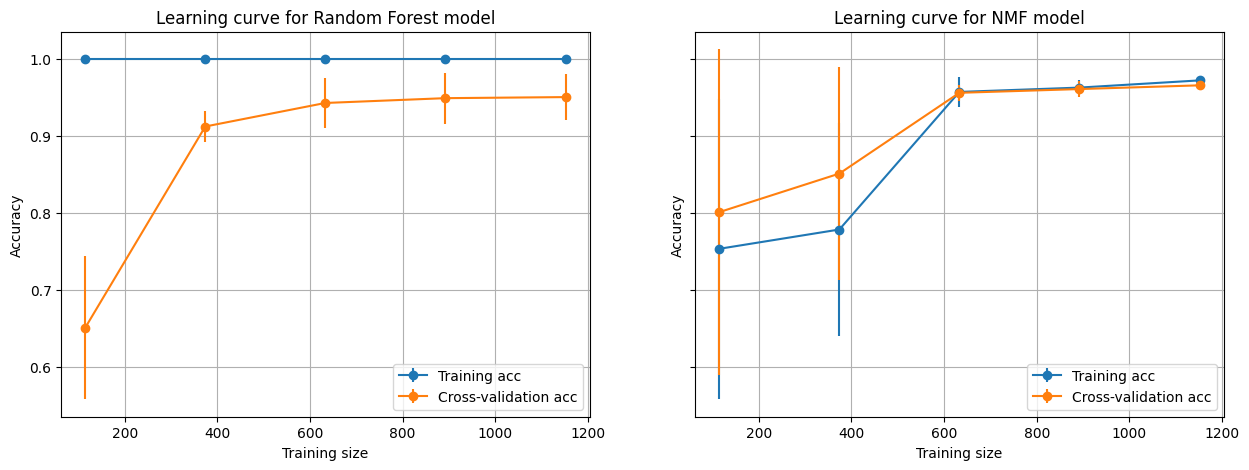

In [190]:
# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
plot_learning_curve(train_sizes,train_scores,test_scores,'Learning curve for Random Forest model',axes[0])
plot_learning_curve(train_sizes,train_scores_nmf,test_scores_nmf,'Learning curve for NMF model',axes[1])

In [211]:
# Methods to recombine text
import functools
from itertools import combinations
def get_word_cum_sum_split_by_points(s):
    return np.cumsum(np.array([len(q.split()) for q in s.split('.')]))

def split_text_by_quantile(text,quantile='random'):   
    """
    Inputs:
    - Text: a string including some periods ('.') to be split at some quantile
    - quantile: float between 0.0 and 1.0 or 'random', indicating the
            quantile of number of words to be used as a split base.
            If 'random' is chosen, a random value is choseon from [0.25, 0.50, 0.75]
    """    

        
    word_lists_per_sentence = [sentence.split() for sentence in text.split('.') if len(sentence) is not 0]
    cum_num_words_per_sentence = np.cumsum(np.array([len(sentence) for sentence in word_lists_per_sentence]))
    
    try:
        q = np.quantile(cum_num_words_per_sentence,quantile)
    except TypeError: # quantile = 'random'
        q = np.quantile(cum_num_words_per_sentence,np.random.choice([0.25,0.5,0.75]))
        
    cut_point = find_nearest_ind(cum_num_words_per_sentence,q)
    add_sentences = lambda x,y: x + y
    add_words = lambda x,y: x +' '+ y
    n=cum_num_words_per_sentence[-1]

    part1 = functools.reduce(add_words, functools.reduce(add_sentences, word_lists_per_sentence[0:cut_point]))
    part2 = functools.reduce(add_words, functools.reduce(add_sentences, word_lists_per_sentence[cut_point:]))

    return part1, part2

def recombine_texts(text1,text2,quantile=0.5):        
    t1_part1, t1_part2 = split_text_by_quantile(text1,quantile)
    t2_part1, t2_part2 = split_text_by_quantile(text2,quantile)
    new_text1 = t1_part1 + ' ' + t2_part2
    new_text2 = t2_part1 + ' ' + t1_part2
    return new_text1,new_text2

def create_combinations_df(Texts:pd.Series,combinations_dict:dict,limit_per_category='min'):
    """
    Combine texts to create a DataFrame with 'Text'  and 'Category' that can be used to augment training size
    
    """
    assert (isinstance(limit_per_category ,int) or limit_per_category in ['min',None]), "limit should be None,'min', or an integer"
    if limit_per_category is None:
        limit = np.inf
    elif limit_per_category is 'min':
        limit = min([v['num_pairs'] for v in combinations_dict.values()])
    else:
        limit = limit_per_category
    results = {'Category':[],
               'Text':[]}
    print('\nComputing 2*{} text recombinations per category:'.format(limit))
    for cat, v in combinations_dict.items():        
        n_items = min([v['num_pairs'],limit])
        for k in tqdm(range(n_items),desc='Category = {}'.format(cat)):
            i,j = v['pairs'][k]
            t1, t2 =recombine_texts(Texts[i],Texts[j])
            results['Category'].append(cat)
            results['Category'].append(cat)
            results['Text'].append(t1)
            results['Text'].append(t2)
    return pd.DataFrame(results)
            
def get_combination_indexes(train_df):
    """
    Get indexes with all pairs of Clean texts from same categories.
    Returns a dictionary with key=Category, where each value is a dictionaty containing:
    - num_pairs: number of pairs that can be generated
    - pairs: 
    """
    G = train_df.groupby('Category')
    combinations_dict = dict()
    for category,g in G:
        ind = g.index.values
        np.random.shuffle(ind) # this will only partially randomize
        n= len(ind)
        combinations_dict[category] = {'num_pairs':int((n*(n-1))/2),
                            'pairs': create_shuffled_pairs(ind)
                           }    
    return combinations_dict

def create_shuffled_pairs(x):
    pairs = [_ for _ in combinations(x,2)]
    np.random.shuffle(pairs)
    return pairs
        
def find_nearest_ind(a,a0):
    """ find index of closest value in array a to a0"""
    return np.abs(a - a0).argmin()

<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/gy/2ly271h95f334wv2rlrv6y4w0000gn/T/ipykernel_43900/270327239.py:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  word_lists_per_sentence = [sentence.split() for sentence in text.split('.') if len(sentence) is not 0]
/var/folders/gy/2ly271h95f334wv2rlrv6y4w0000gn/T/ipykernel_43900/270327239.py:50: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif limit_per_category is 'min':


In [195]:
# Reload data and remove duplicates.
train_df_full = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Train.csv").drop_duplicates(subset=['Text'])
train_df, crossval_df = train_test_split(train_df_full,stratify=train_df_full[['Category']],test_size=0.2,random_state = 310)
crossval_df['Text'] = clean_text(crossval_df['Text'])
train_df_full['Text'] = clean_text(crossval_df['Text'])

train_df['Text_with_dots']=clean_text(train_df,keep_dots=True)
train_df

,ArticleId,Text,Category,Text_with_dots
633,1805,dublin hi-tech labs to shut down dublin s hi-t...,tech,dublin hitech labs to shut down dublin s hitec...
457,1717,regiments group in poll move a regiments cam...,politics,regiments group in poll move a regiments cam...
1233,555,bnp leader nick griffin arrested the leader of...,politics,bnp leader nick griffin arrested the leader of...
1372,557,barbarians 19-47 new zealand new zealand prove...,sport,barbarians number number new zealand new ze...
489,563,cable offers video-on-demand cable firms ntl a...,tech,cable offers videoondemand cable firms ntl and...
...,...,...,...,...
625,814,us budget deficit to reach $368bn the us budge...,business,us budget deficit to reach money the us budget...
1093,70,indonesia declines debt freeze indonesia no ...,business,indonesia declines debt freeze indonesia no ...
1068,825,prime minister s questions so who if anyone ...,politics,prime minister s questions so who if anyone ...
470,1686,de niro completes box office coup robert de ni...,entertainment,de niro completes box office coup robert de ni...


Descriptive statictics of the number of periods per article in the training set:


,Dot count
count,1152.000000
mean,19.494792
std,11.045281
min,4.000000
25%,13.000000
50%,18.000000
75%,24.000000
max,153.000000


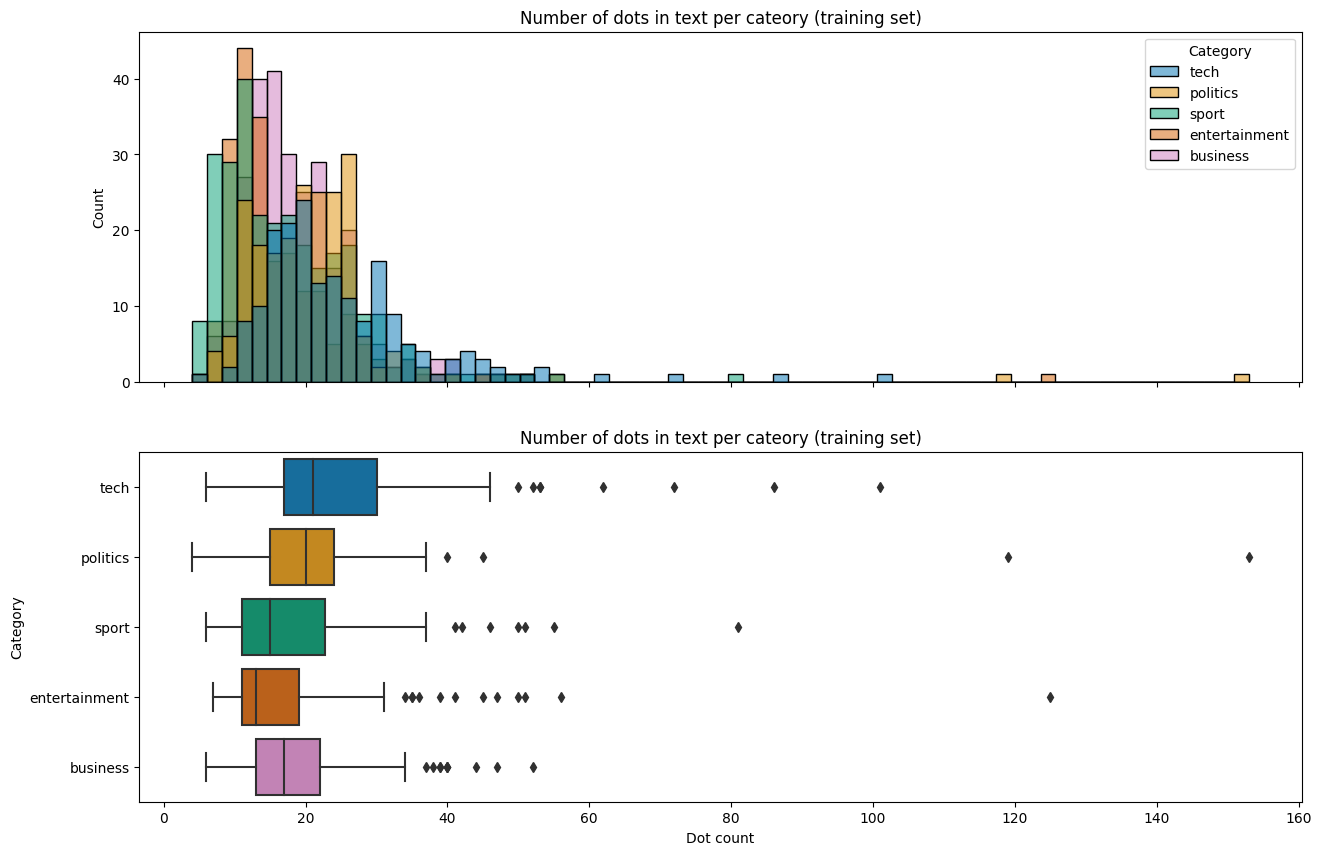

In [196]:
def count_dots(text):
    return text.count('.')

# Statistics about the number of dots in articles
train_df['Dot count'] = train_df['Text_with_dots'].apply(count_dots)

fig,axs = plt.subplots(nrows=2,figsize=(15,10),sharex=True)
sns.histplot(train_df,
             ax=axs[0],
             x='Dot count',
             hue='Category',
             palette='colorblind').set(
             title='Number of dots in text per cateory (training set)');

sns.boxplot(        
        ax = axs[1],
        data = train_df, 
        x = 'Dot count', 
        y = 'Category',
        palette = 'colorblind',    
        ).set(
            title = 'Number of dots in text per cateory (training set)');

print('Descriptive statictics of the number of periods per article in the training set:')
pd.DataFrame(train_df['Dot count'].describe())

In [197]:
print('*** Original text of article with most dots: ***')
train_df.loc[train_df['Dot count'].idxmax(),'Text']

*** Original text of article with most dots: ***


'minimum wage increased to £5.05 the minimum wage will rise in october  benefiting more than 1m people  the government has announced.  adults must be paid at least £5.05 an hour  up from £4.85  while 18 to 21 year olds will be paid £4.25. the recommendations came from the low pay commission which said the number of jobs had continued to grow since the minimum wage was introduced in 1999. businesses wanted it frozen  warning more rises could damage competitiveness but the unions want a £6 rate.  a further increase in the adult rate to £5.35 an hour is provisionally scheduled for october 2006. according to the commission  many businesses had found the last two significant increases in the minimum wage  challenging .  we have therefore recommended only a slight increase above average earnings  and concentrated it in the second year to allow business more time to absorb the impact   said chairman adair turner. the government says most of those on the minimum wage are women - with many work

In [206]:

q = 0.25
print(' Split 2 sample texts by paragraph according to quantile q{:.0f}:'.format(q*100))
print('\nText 1 ():')
T1 = train_df[train_df['Category']=='business']['Text_with_dots'].iloc[0]
for i,t in enumerate(split_text_by_quantile(T1,q)):
    print(' Part {} ({} words):\n -> {}'.format(i+1,len(t.split(' ')),t))
    
print('\nText 2')
T2 = train_df[train_df['Category']=='business']['Text_with_dots'].iloc[1]
for i,t in enumerate(split_text_by_quantile(T2,q)):
    print(' Part {} ({} words):\n -> {}'.format(i+1,len(t.split(' ')),t))

 Split 2 sample texts by paragraph according to quantile q25:

Text 1 ():
 Part 1 (78 words):
 -> splitcaps pay money m compensation investors who lost money following the splitcapital investment trust scandal are to receive money m compensation the uk s financial watchdog has announced eighteen investment firms involved in the sale of the investments agreed the compensation package with the financial services authority fsa splits were marketed as a lowrisk way to benefit from rising share prices but when the stock market collapsed in number the products left thousands of investors out of pocket
 Part 2 (248 words):
 -> an estimated number people took out splitcapital funds some investing their life savings in the schemes the paying of compensation will be overseen by an independent company the fsa said further details of how investors will be able to claim their share of the compensation package will be announced in the new year this should save investors from having to take their cas

In [207]:
print("Recombined texts:")
recombine_texts(T1,T2,quantile=0.25)

Recombined texts:


('splitcaps pay money m compensation investors who lost money following the splitcapital investment trust scandal are to receive money m compensation the uk s financial watchdog has announced eighteen investment firms involved in the sale of the investments agreed the compensation package with the financial services authority fsa splits were marketed as a lowrisk way to benefit from rising share prices but when the stock market collapsed in number the products left thousands of investors out of pocket iran currently has only one heavily congested mobile network with long waiting lists for new subscribers turkcell signed a contract for the new network in september the new operator planned to offer subscriptions for about money well below the existing firm s money price tag but a parliamentary commission has now ruled that turkcell s number controlling stake is too high they say that turkcell is a security risk because of alleged business ties with israel parliament as a whole dominated 

In [208]:
col1 = 'original articles (n)'
col2 = 'possible new articles by recombination (p)'
article_counts = pd.DataFrame(train_df.groupby('Category').count()['Text'].rename(col1))
article_counts['%n']=np.round(100*article_counts[col1]/sum(article_counts[col1]),2)
article_counts[col2] = article_counts[col1].apply(lambda n: n*(n-1))
article_counts['%p']=np.round(100*article_counts[col2]/sum(article_counts[col2]),2)
article_counts

,original articles (n),%n,possible new articles by recombination (p),%p
Category,,,,
business,268,23.26,71556,26.48
entertainment,210,18.23,43890,16.24
politics,213,18.49,45156,16.71
sport,274,23.78,74802,27.69
tech,187,16.23,34782,12.87


In [209]:
print('Ratio of samples in class with most samples to samples in class with least number of samples:')
r1 = np.round(article_counts[col1].max()/article_counts[col1].min(),2)
r2 = np.round(article_counts[col2].max()/article_counts[col2].min(),2)
print('=> ',col1,' ratio =',r1)
print('=> ',col2,' ratio =',r2)

Ratio of samples in class with most samples to samples in class with least number of samples:
=>  original articles (n)  ratio = 1.47
=>  possible new articles by recombination (p)  ratio = 2.15


In [212]:
train_df['Text_with_points']=clean_text(train_df,keep_dots=True)
new_samples_df = create_combinations_df(train_df['Text_with_points'],get_combination_indexes(train_df),limit_per_category=460)
train_df['Text']=clean_text(train_df['Text'])
train_df=train_df.loc[:,['Text','Category']] # filter desired columns
train_df_aug = pd.concat([train_df,new_samples_df])


Computing 2*460 text recombinations per category:


Category = tech: 100%|██████████████████████| 460/460 [00:00<00:00, 1994.88it/s]


In [213]:
print('Original training set with {} samples:' .format(len(train_df)))
train_df.groupby('Category').describe()

Original training set with 1152 samples:


Text                                                            \
              count unique                                                top   
Category                                                                        
business        268    268  splitcaps pay money m compensation investors w...   
entertainment   210    210  fockers fuel festive film chart comedy meet th...   
politics        213    213  regiments  group in poll move a regiments  cam...   
sport           274    274  barbarians  number  number  new zealand new ze...   
tech            187    187  dublin hitech labs to shut down dublin s hitec...   

                    
              freq  
Category            
business         1  
entertainment    1  
politics         1  
sport            1  
tech             1

In [214]:
print('Augmented training set with {} samples (may includes some repeated samples):'.format(len(train_df_aug)))
train_df_aug.groupby('Category').describe()

Augmented training set with 5752 samples (may includes some repeated samples):


Text                                                            \
              count unique                                                top   
Category                                                                        
business       1188   1188  splitcaps pay money m compensation investors w...   
entertainment  1130   1130  fockers fuel festive film chart comedy meet th...   
politics       1133   1133  regiments  group in poll move a regiments  cam...   
sport          1194   1194  barbarians  number  number  new zealand new ze...   
tech           1107   1106  microsoft gets the blogging bug software giant...   

                    
              freq  
Category            
business         1  
entertainment    1  
politics         1  
sport            1  
tech             2

In [215]:
train_df_aug.drop_duplicates(subset=['Text'],inplace=True)
print('After removing duplicates, we get: {} samples'.format(len(train_df_aug)))
print('Data augmentation has incresed the training data by a factor of: {:.0f}X'.format(len(train_df_aug)/len(train_df)))

After removing duplicates, we get: 5751 samples
Data augmentation has incresed the training data by a factor of: 5X


,words per article in original set,words per article in augmented set
count,1152.000000,5751.000000
mean,449.288194,405.682142
std,256.283551,187.453397
min,101.000000,101.000000
25%,294.000000,285.000000
50%,393.000000,372.000000
75%,540.000000,485.000000
max,3815.000000,3815.000000


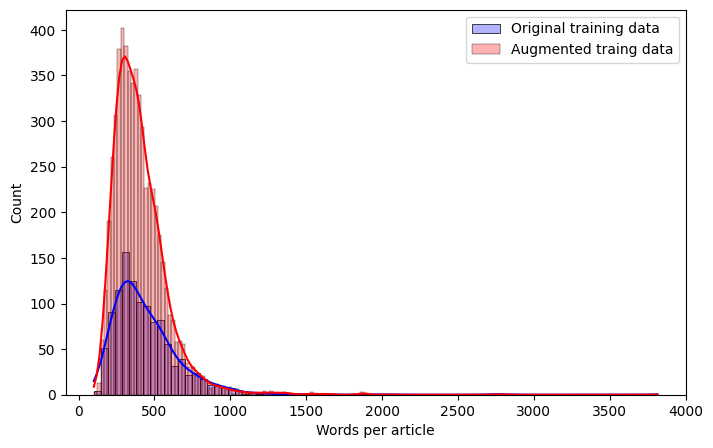

In [216]:
_,axs = plt.subplots(ncols=1,figsize=(8,5))
w1 = train_df['Text'].apply(lambda s: len(s.split(' ')))
w2 = train_df_aug['Text'].apply(lambda s: len(s.split(' ')))
sns.histplot(w1,color='blue',alpha=0.3,label='Original training data',kde=True,ax=axs)
sns.histplot(w2,color='red',alpha=0.3,label='Augmented traing data',kde=True,ax=axs).set(xlabel='Words per article')
axs.legend();
pd.DataFrame({'words per article in original set':w1.describe(),'words per article in augmented set':w2.describe()})

In [217]:
print('This computation may take around 10 minutes...')
fracs = [0.15, 0.33, 0.55, 0.78, 0.85, 1.0]
nsamples = []

# Manually compute training curve for NMF model for same number of train sizes
train_scores_nmf = np.zeros((len(fracs),5))
test_scores_nmf = np.zeros((len(fracs),5))
train_scores_rf = np.zeros((len(fracs),5))
test_scores_rf = np.zeros((len(fracs),5))


for  i,f in tqdm(enumerate(fracs),desc='Computing training curves for NMF and RF models using augmented dataset with 5-fold validaton',total=len(fracs)): 
    for j in range(5):        
        try:
            train_df_aug_sample, _ = train_test_split(train_df_aug,stratify=train_df_aug[['Category']],train_size=f)        
        except ValueError:
            train_df_aug_sample = train_df_aug                    
        
        # Prepare data
        train_data_aug = MyData(train_df_aug_sample,TfidfVec=None,clean_text=False,**best_NMF_model['TtdifVec_params'])
        cross_val_data = MyData(crossval_df,TfidfVec=train_data_aug.tv,clean_text=True)
        y_true_train = train_data_aug.df['Category']
        y_true_cv = cross_val_data.df['Category']
# NMF model
        mnf = MyNMF(5, **best_NMF_model['NMF_params']).fit(train_data_aug, y_true_train) 
        train_scores_nmf[i,j] = mnf.train_score_
        test_scores_nmf[i,j] = metrics.accuracy_score(y_true_cv, mnf.predict(cross_val_data))
        
        # RF model
        rf_model = RandomForestClassifier(n_jobs=-1,**best_RF_model_params).fit(train_data_aug.WC2, y_true_train)
        train_scores_rf[i,j] = metrics.accuracy_score(y_true_train, rf_model.predict(train_data_aug.WC2))
        test_scores_rf[i,j] = metrics.accuracy_score(y_true_cv, rf_model.predict(cross_val_data.WC2))
    nsamples.append(len(train_df_aug_sample))

This computation may take around 10 minutes...


Computing training curves for NMF and RF models using augmented dataset with 5-f


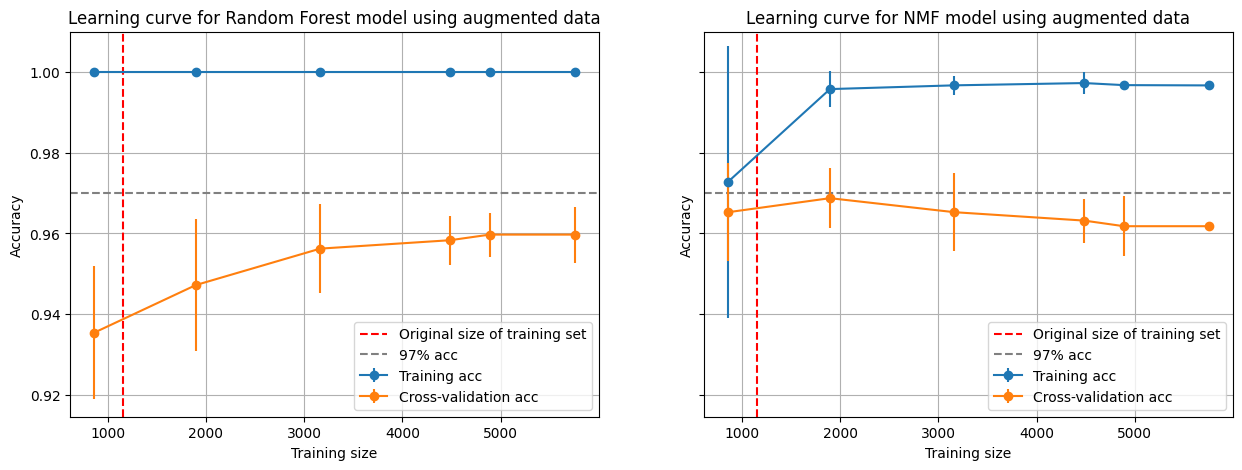

In [218]:
# Plot learning curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5),sharey=True)
axes[0].axvline(x = len(train_df),color = 'r',ls='--', label = 'Original size of training set');
axes[1].axvline(x = len(train_df),color = 'r',ls='--', label = 'Original size of training set');
axes[0].axhline(y = 0.97,color = 'gray',ls='--', label = '97% acc');
axes[1].axhline(y = 0.97,color = 'gray',ls='--', label = '97% acc');
plot_learning_curve(nsamples,train_scores_rf,test_scores_rf,'Learning curve for Random Forest model using augmented data',axes[0]);
plot_learning_curve(nsamples,train_scores_nmf,test_scores_nmf,'Learning curve for NMF model using augmented data',axes[1]);
ymin,_ = axes[0].get_ylim()
axes[0].set_ylim(ymin,1.01);
axes[1].set_ylim(ymin,1.01);

In [221]:
test_df = pd.read_csv("/Users/pranavchole/Downloads/learn-ai-bbc/BBC News Test.csv")
test_data = MyData(test_df,TfidfVec=train_data_aug.tv,clean_text=True)

# Use the last MNF model in the training curve
y_pred_test = mnf.predict(test_data)

print('This new submission is based on a single NMF model trained with data augmentation')
    
# DataFrame for submission
filename = 'submission.csv'
try:
    os.remove("/Users/pranavchole/Downloads/learn-ai-bbc/submission.csv") # remove csv file if it exists
except: 
    pass
nmd_predictions = test_data.df.copy()
nmd_predictions['Category']=y_pred_test
nmd_predictions.drop("Text",axis=1,inplace=True)
print('Submission test set predictions with NMF saved as {}'.format(filename))
nmd_predictions.to_csv('/Users/pranavchole/Downloads/learn-ai-bbc/submission.csv', index=False)
nmd_predictions

This new submission is based on a single NMF model trained with data augmentation
Submission test set predictions with NMF saved as submission.csv


,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,sport
3,459,business
4,1020,sport
...,...,...
730,1923,business
731,373,entertainment
732,1704,politics
733,206,business
